# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

sns.set()

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To print model performance in visual table
from prettytable import PrettyTable

import scipy.stats as stats
import pylab

import statsmodels.stats.api as sms
from statsmodels.compat import lzip


## Loading the dataset

In [4]:
rcData = pd.read_csv("used_device_data.csv")
rcData.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [5]:
rcData.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android        15.34  yes  no             NaN   
3450       Asus  Android        15.24  yes  no            13.0   
3451    Alcatel  Android        15.80  yes  no            13.0   
3452    Alcatel  Android        15.80  yes  no            13.0   
3453    Alcatel  Android        12.83  yes  no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [6]:
# check shape of Re-Cell dataset
rcData.shape

(3454, 15)

In [7]:
# Check the data types of the columns for the Re-Cell dataset
rcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [8]:
# check duplicates if any
rcData.duplicated().sum()

0

In [9]:
# check missing values if any
rcData.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [10]:
# Statistical summarry on the numerical dataset
rcData.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

### Observations ###
  -  There are 3454 rows and 15 columns.
  -  Brand name and OS is a string object.
  -  4g and 5g are categeorical variables and take Yes/No value
  -  Need to build a model for `normalized_used_price` a.k.a can be `Y target`
  -  All other columns OR features from `machine learning perpective`, can be referred as `features variable`   
### Sanity checks ###
  -  There are no duplicates.
  -  There are missing values, that means imputing may be required before building up the model 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Perform Univariate analysis

- Based on the data type - float64/int64, draw the histogram/boxplot.

    - `screen_size`
    - `main_camera_mp`
    - `selfie_camera_mp`
    - `int_memory`
    - `ram`
    - `battery`
    - `weight`
    - `days_used`
    - `normalized_used_price`
    - `normalized_new_price`

- Based on the data type - Object, draw the barplot. Note: release_year is drwan as a bar plot, even though the data type is int, its interpreted as year (date format) so it will make more sense to draw the bar plot to infer details about the `release_year`

    - `brand_name`
    - `os`
    - `4g`
    - `5g`
    - `release_year`

**`Method` commonly used to draw histogram and box plot together and get crisp visuals designed for `numerical` variables**

In [11]:
# Reusable code  
# Visualize both the histogram and box plot for each variable to gain clear insights into the data distribution and characteristics.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Data analysis for all numerical columns to understand 
- Outliers
- Data distribution 

**`normalized_used_price`**

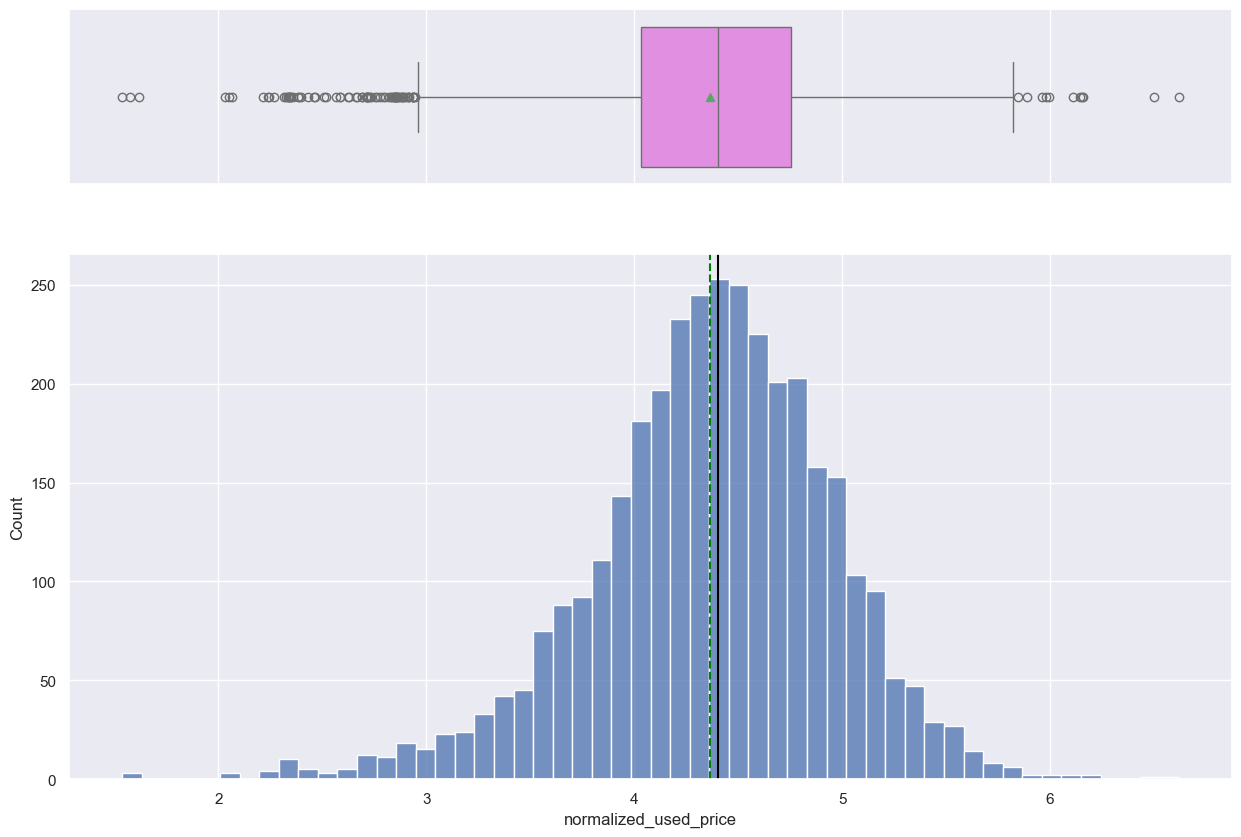

In [12]:
histogram_boxplot(rcData, "normalized_used_price")

- Mean (green line) is less than median (black line) - indicate data distibution is slightly left skewed.
- Its evident based on the histogram and boxplot
- There are also quite a few outliers on both side of the whisker

**`normalized_new_price`**

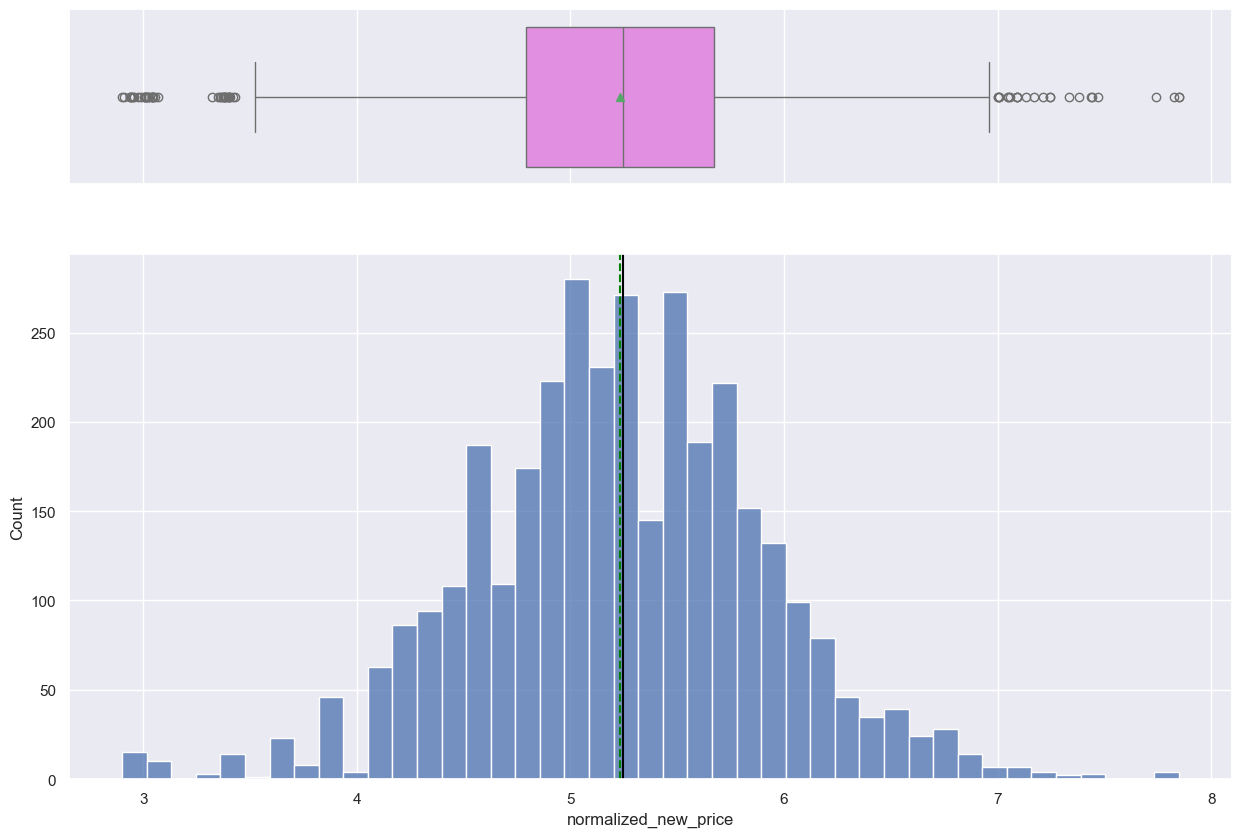

In [13]:
histogram_boxplot(rcData, "normalized_new_price")

- Mean (green line) is almost equal to median (black line) - indicate data distibution is almost normally distributed.
- Its evident based on the histogram and boxplot
- There are also quite a few outliers on both side of the whisker

**`days_used`**

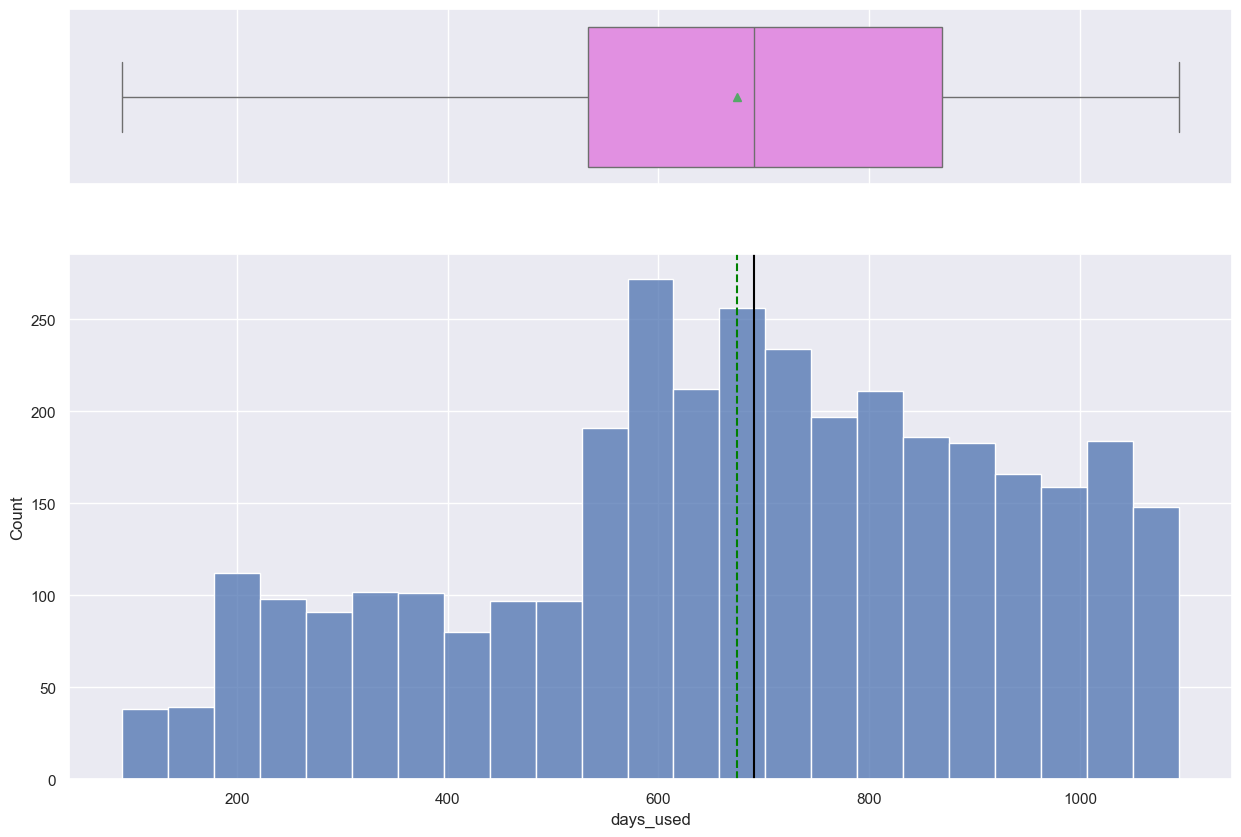

In [14]:
histogram_boxplot(rcData, "days_used")

- Mean (green line) is less than median (black line) - indicate data distibution is slightly left skewed.
- Its evident based on the histogram and boxplot
- There are no outliers
- Median - most observerd days-used are ~700 days which is normal. Though average days-used are slightly less than 700 days, so distribution is right skewed

**`battery `**

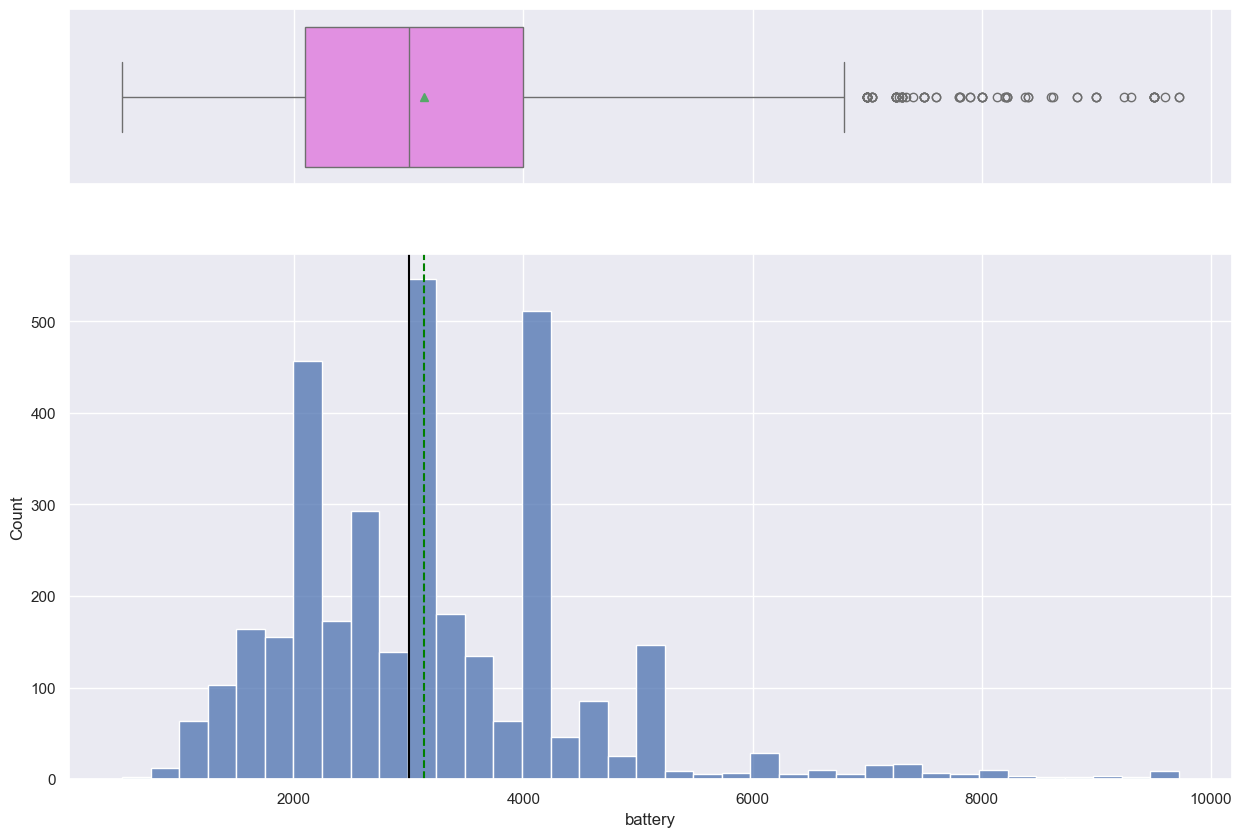

In [15]:
histogram_boxplot(rcData, "battery")

- Mean (green line) is greater than median (black line) - indicate data distibution is right skewed.
- Its evident based on the histogram and boxplot
- There are outliers in the distribution
- Higher the battery capacity will incur more weight and price, and were less in demand

**`weight`**

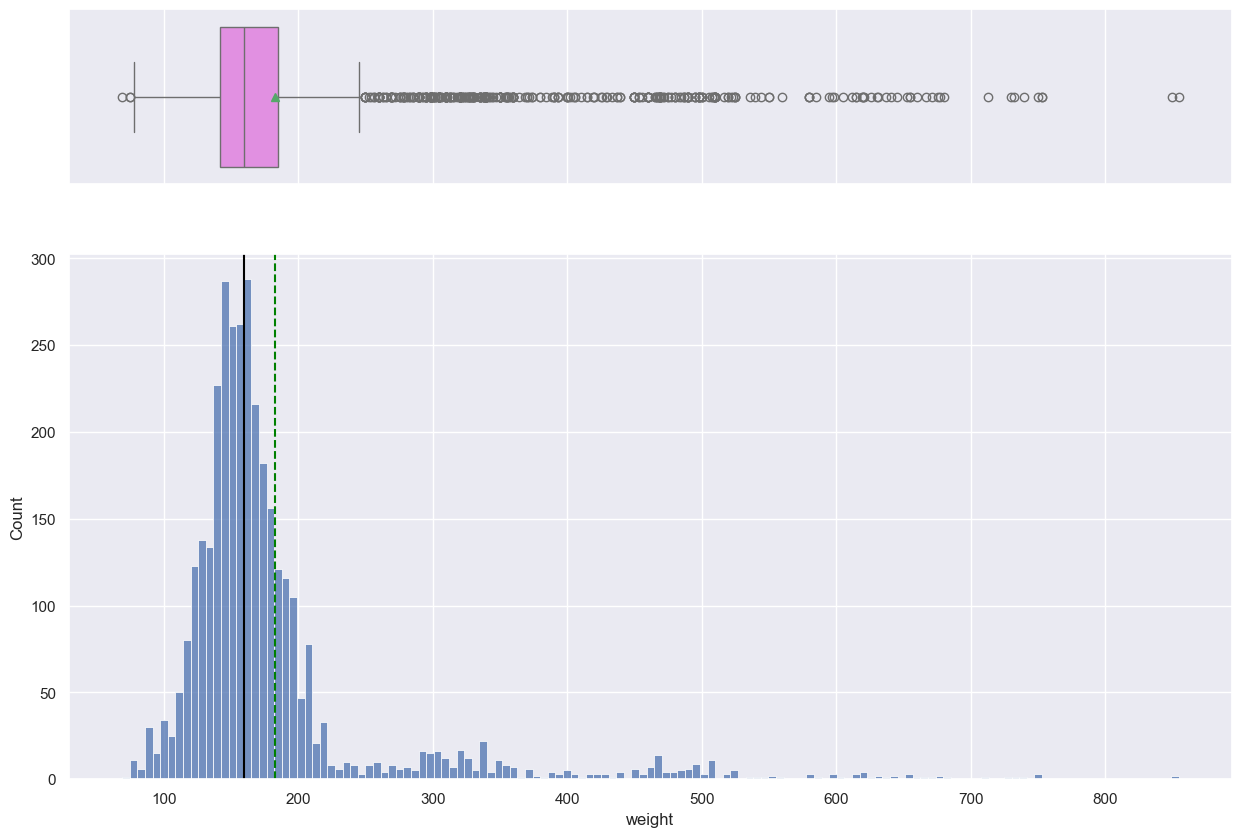

In [16]:
histogram_boxplot(rcData, "weight")

- Mean (green line) is greater than median (black line) - indicate data distibution is right skewed.
- Its evident based on the histogram and boxplot
- There are many outliers
- Higher weight phones are less in demand

**'ram`**

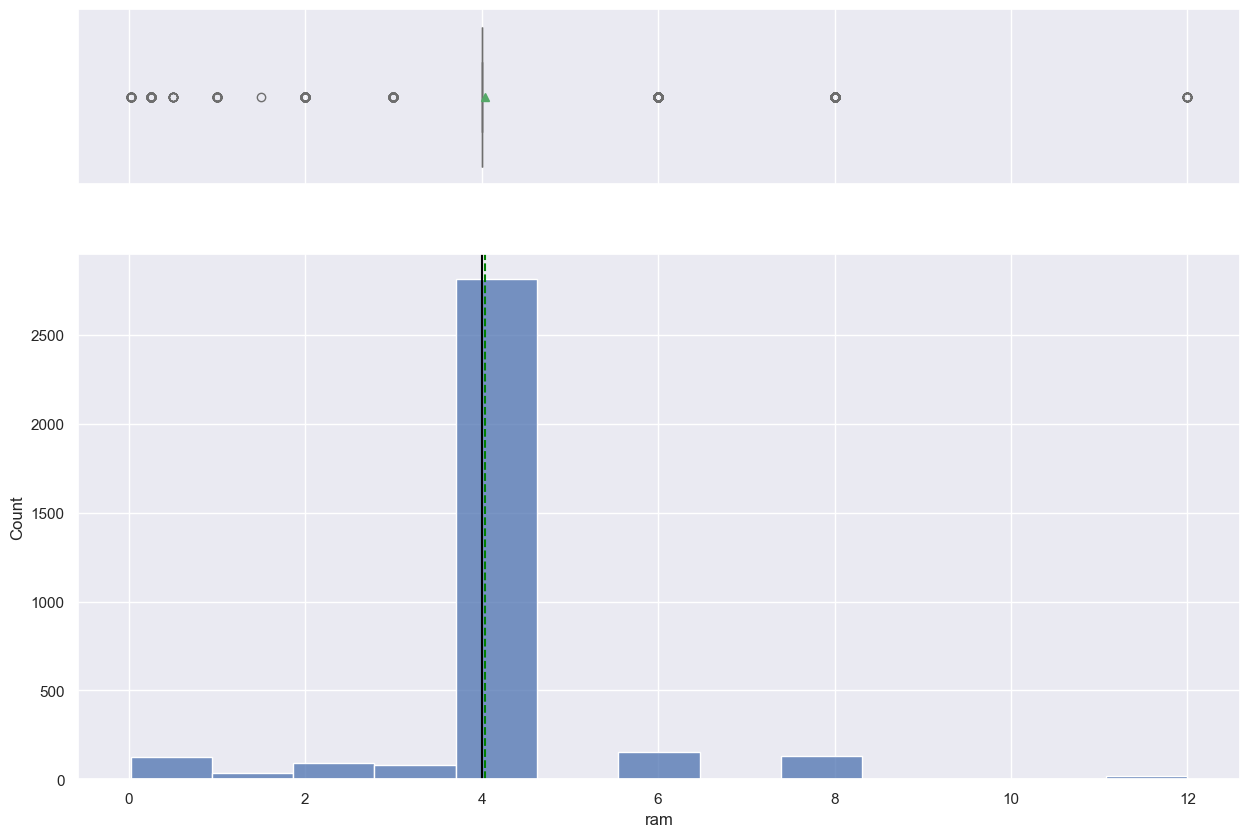

In [17]:
histogram_boxplot(rcData, "ram")

- Mean (green line) is almost equal to median (black line) - indicate data is normally distibuted.
- Its evident based on the histogram and boxplot
- There are few outliers
- Typical ram used in 4GB

**`int_memory `**

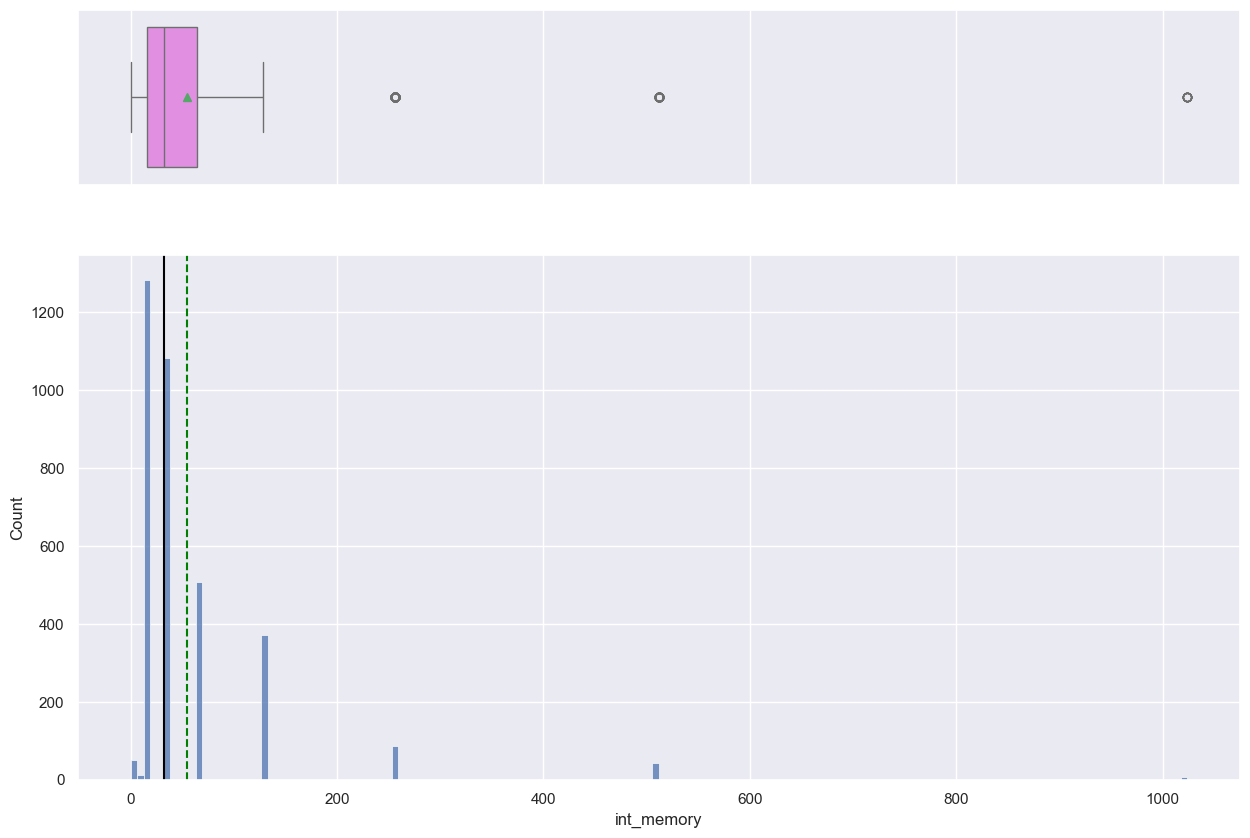

In [18]:
histogram_boxplot(rcData, "int_memory")

- Mean (green line) is greater than median (black line) - indicate data is right skewed.
- Its evident based on the histogram and boxplot
- There are few outliers

**`selfie_camera_mp`**

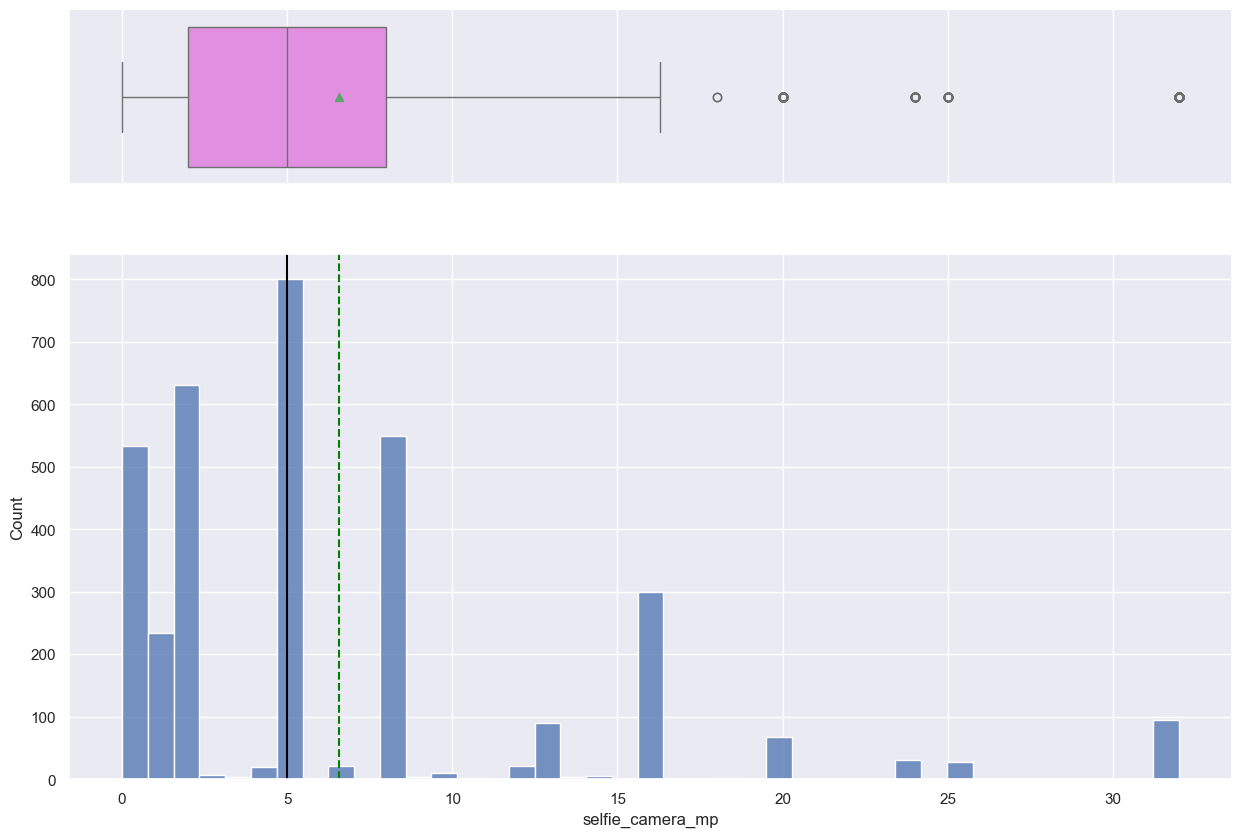

In [19]:
histogram_boxplot(rcData, "selfie_camera_mp")

- Mean (green line) is greater than median (black line) - indicate data is right skewed.
- Its evident based on the histogram and boxplot
- There are few outliers
- Also infer that higher selfie resolution camera was in demand since average is greater than the median (middle most observation)

**`main_camera_mp`**

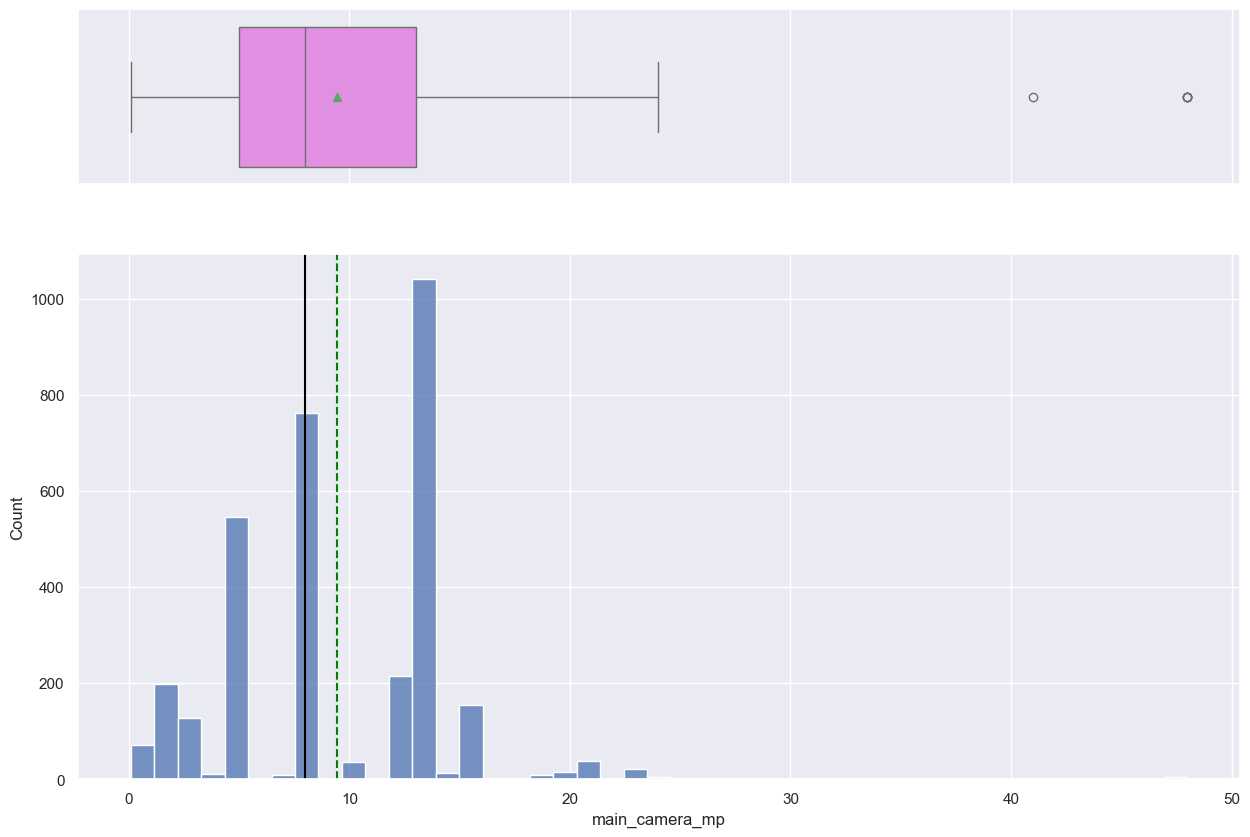

In [20]:
histogram_boxplot(rcData, "main_camera_mp")

- Mean (green line) is greater than median (black line) - indicate data is right skewed.
- Its evident based on the histogram and boxplot
- There are no outliers
- Also infer that higher main resolution camera was in demand since average is greater than the median (middle most observation)

**`screen_size`**

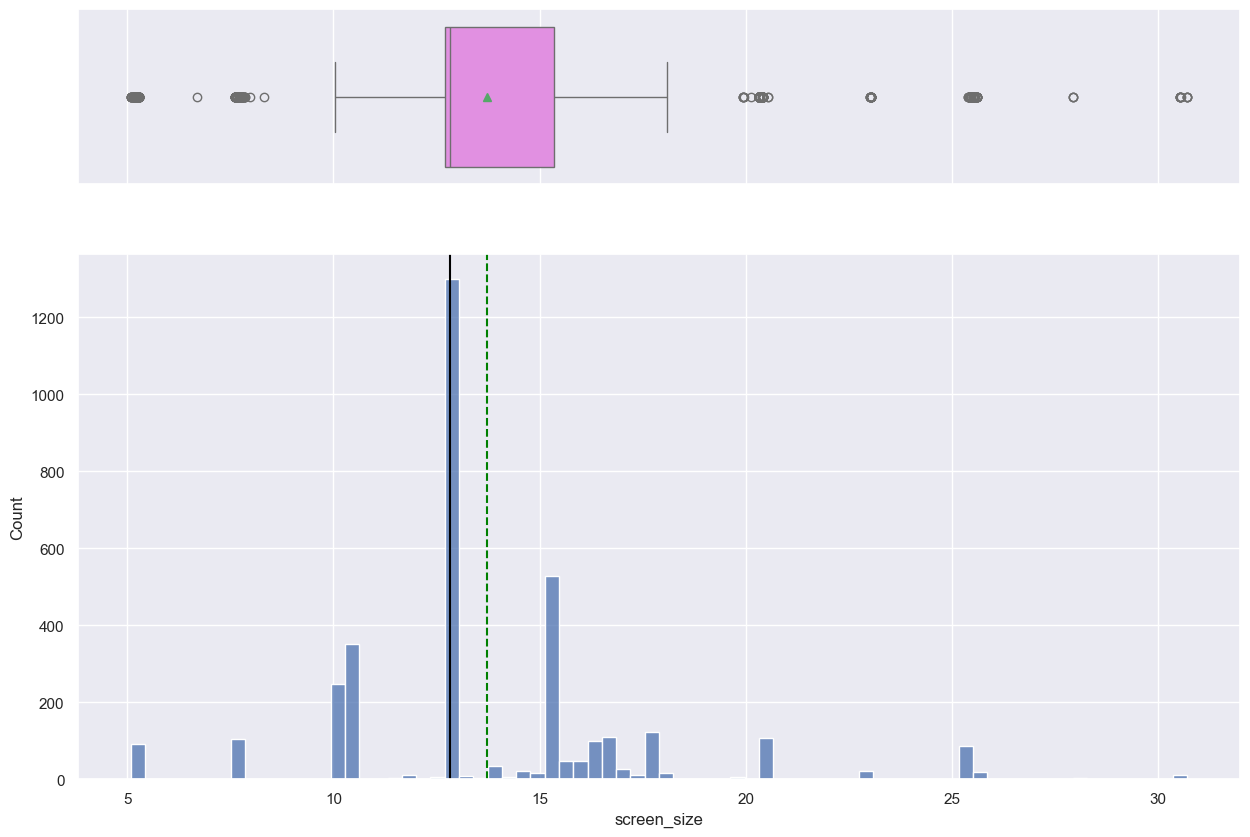

In [21]:
histogram_boxplot(rcData, "screen_size")

- Mean (green line) is greater than median (black line) - indicate data is right skewed.
- Its evident based on the histogram and boxplot
- There are many outliers

**Method commonly used to draw bar plot  and get crisp visuals - designed for `categeorical` variables**

In [22]:
# Reusable code  
# Visualize the bar plot for each variable to gain clear insights into the data characteristics.

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Data analysis for all categeorical columns 

**`brand_name`**

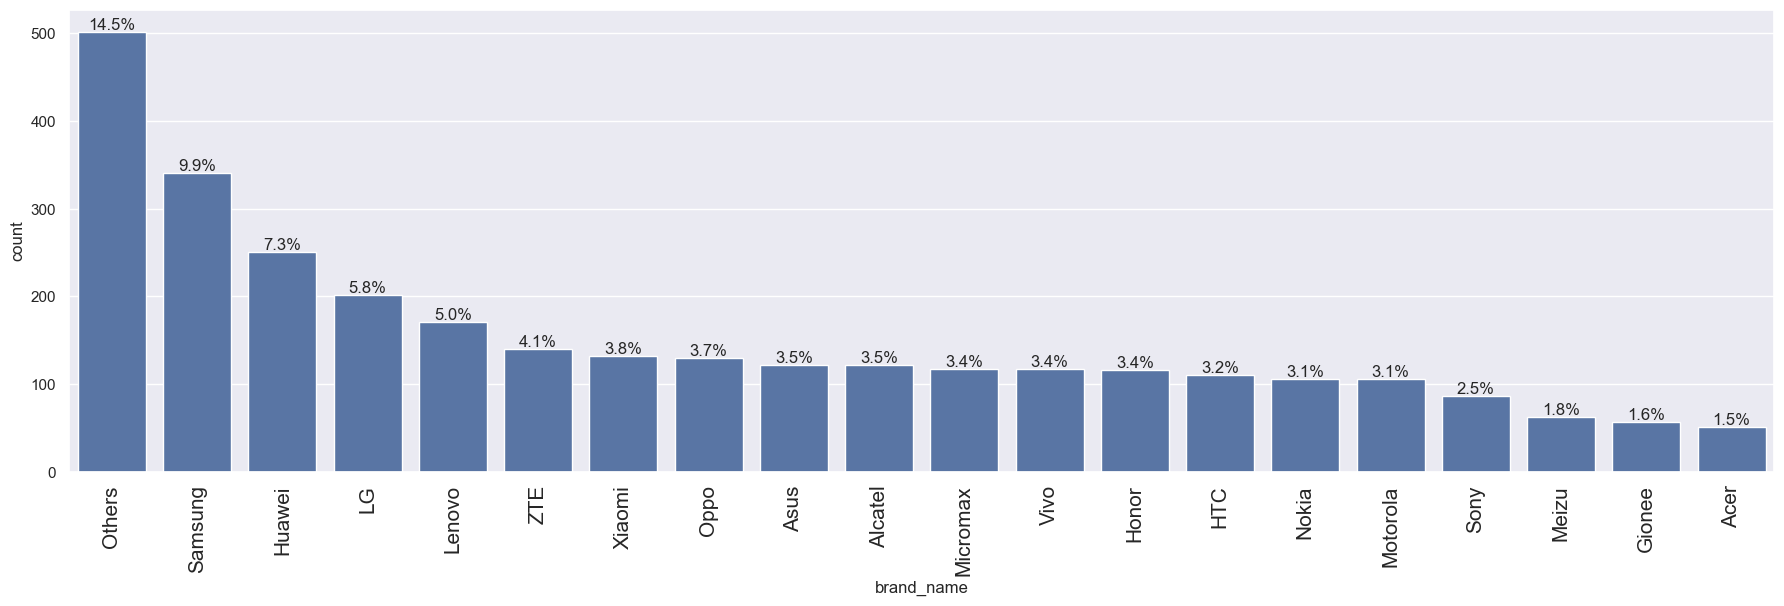

In [23]:
labeled_barplot(rcData, "brand_name", perc=True, n=20)

**`os`**

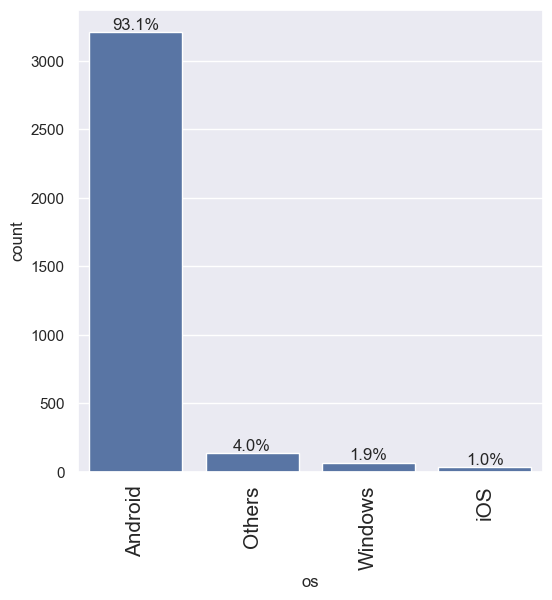

In [24]:
labeled_barplot(rcData, "os", perc=True, n=None)

**`4g`**

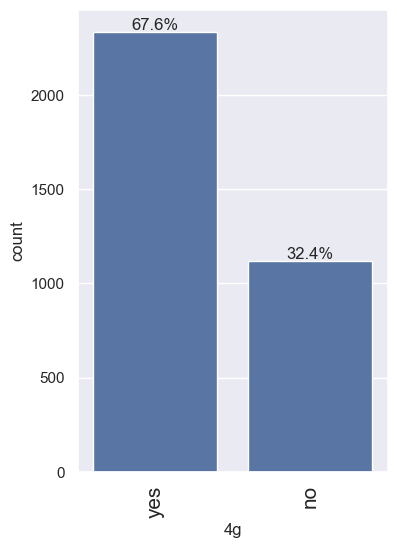

In [25]:
labeled_barplot(rcData, "4g", perc=True, n=None)

**`5g`**

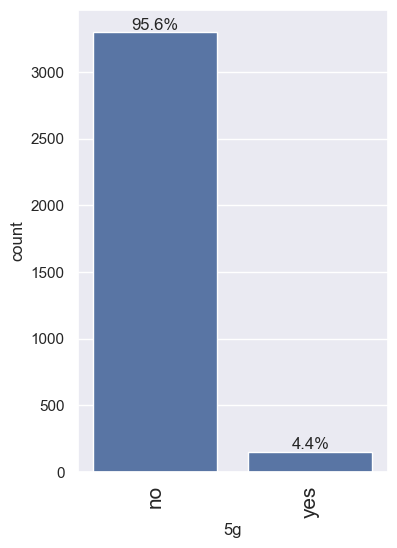

In [26]:
labeled_barplot(rcData, "5g", perc=True, n=None)

**`release_year`**

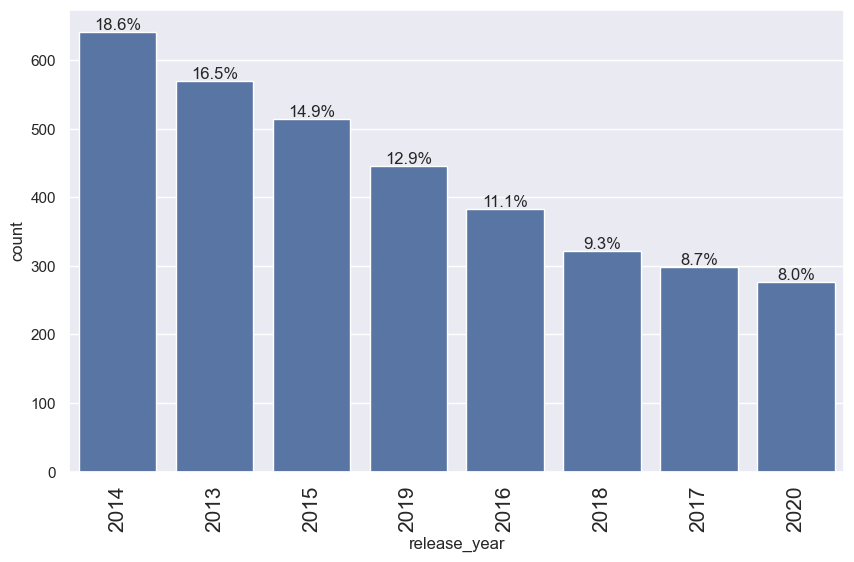

In [27]:
labeled_barplot(rcData, "release_year", perc=True, n=None)

## Perform Bivariate Analysis

In [28]:
rcData_attr = rcData.iloc[:, 0:15]
print(rcData_attr.dtypes)

brand_name                object
os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object


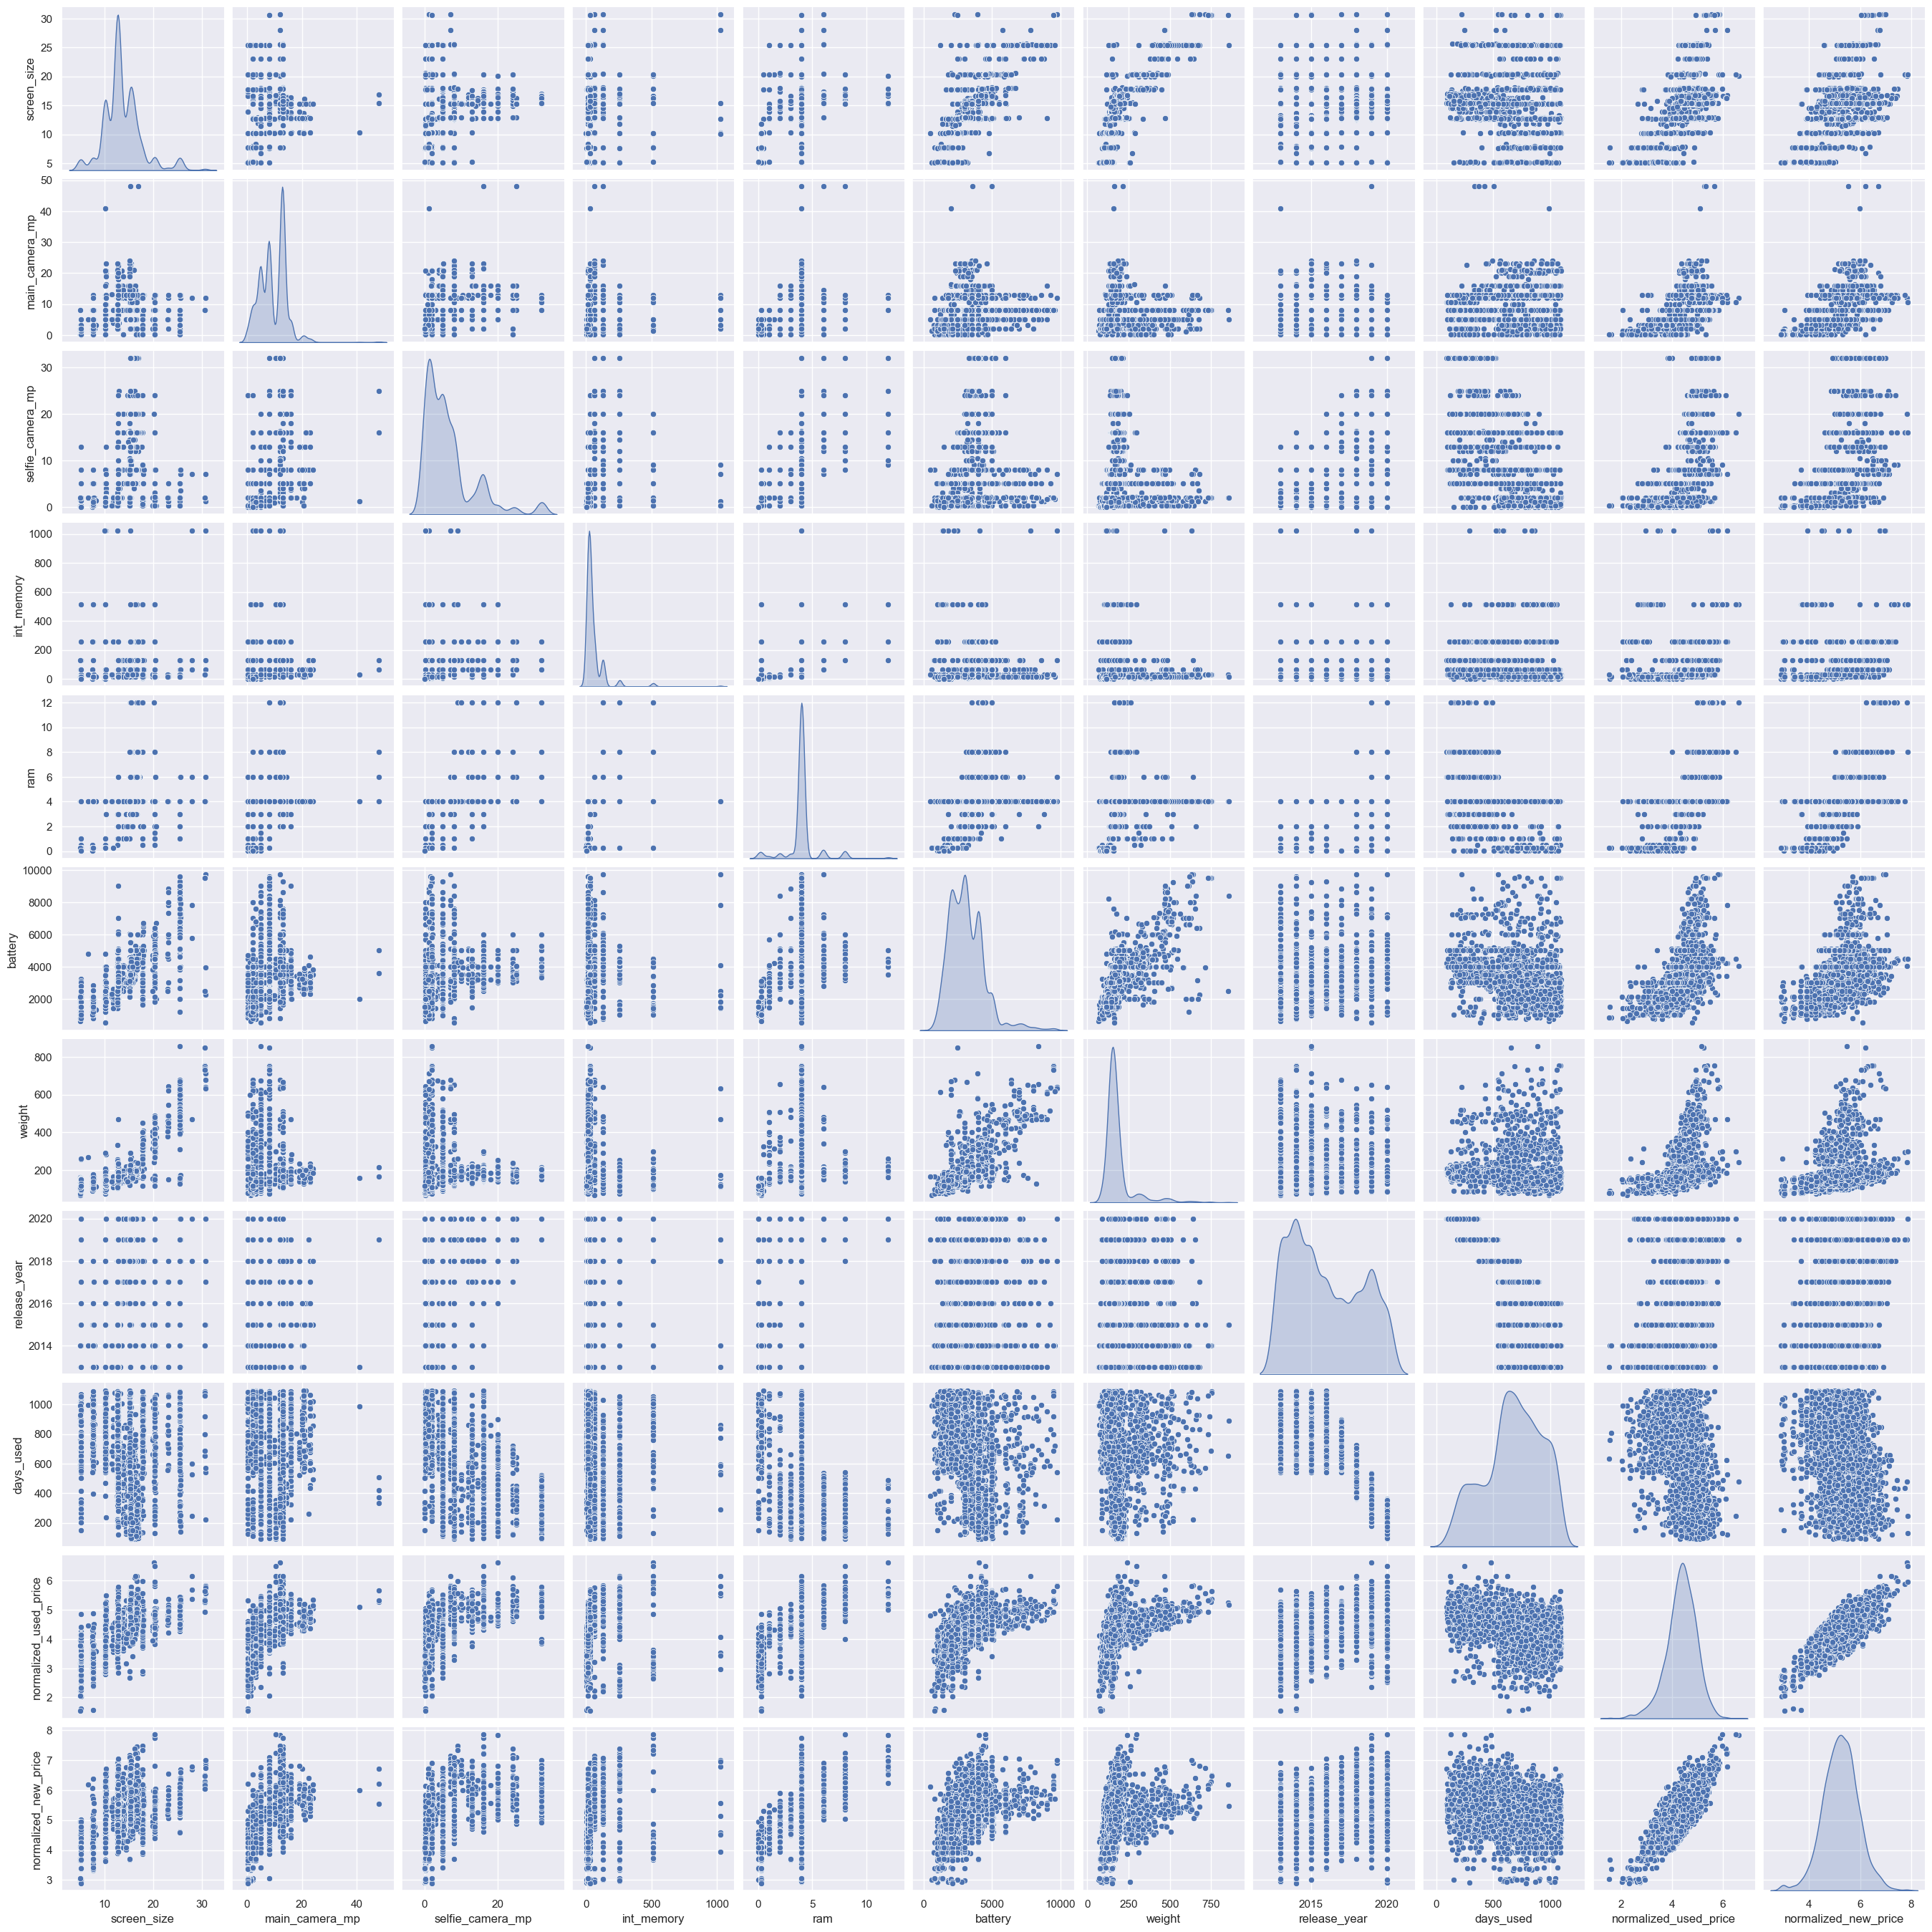

In [29]:
# Ignore warning related to tight_layout() to prevent overlapping elements.
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

rcData_attr = rcData.iloc[:, 0:15]
sns.pairplot(
    rcData_attr, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag
plt.show()

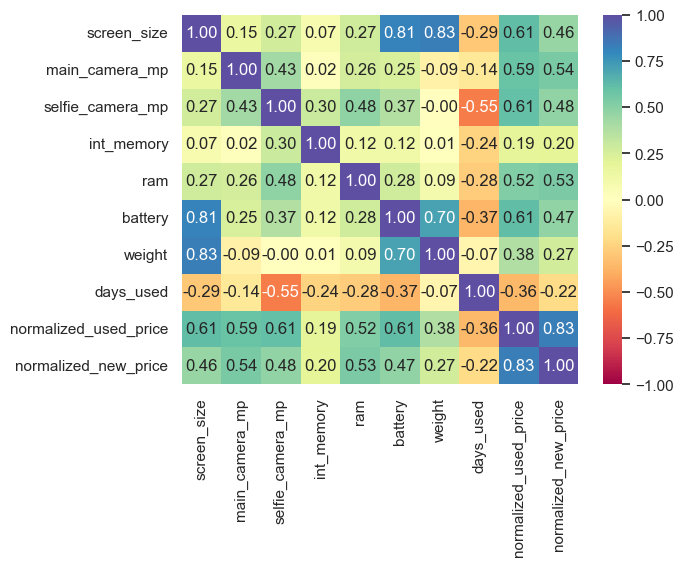

In [30]:
# create heatmap to understand correlation strength between all the x variables
num_cols = rcData.select_dtypes(include=np.number).columns.tolist()
# dropping release_year from list of numerical columns as they are not numerical in nature
num_cols.remove("release_year")
sns.heatmap(
    rcData[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Based on the Data Analysis done above, I'll try to answer the questions being asked. As required, more analysis may be needed to answer few questions and I will elaborate more as I continue to seek answers ##

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**What does the distribution of normalized used device prices look like?**

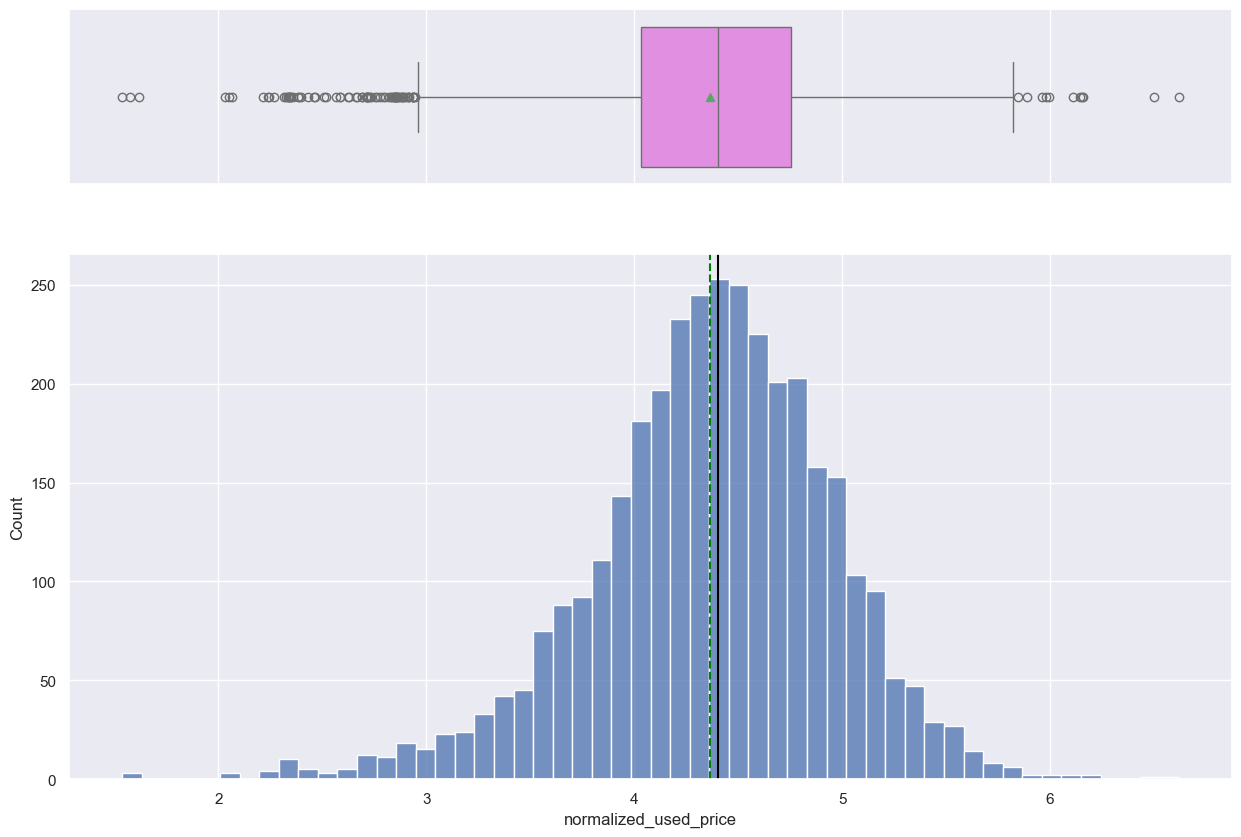

In [31]:
histogram_boxplot(rcData, "normalized_used_price")

- Distribution right skewed slightly, but we probably may call it normal distribution mostly given its a slight right skewed distribution
- Many outliers 

**What percentage of the used device market is dominated by Android devices?**

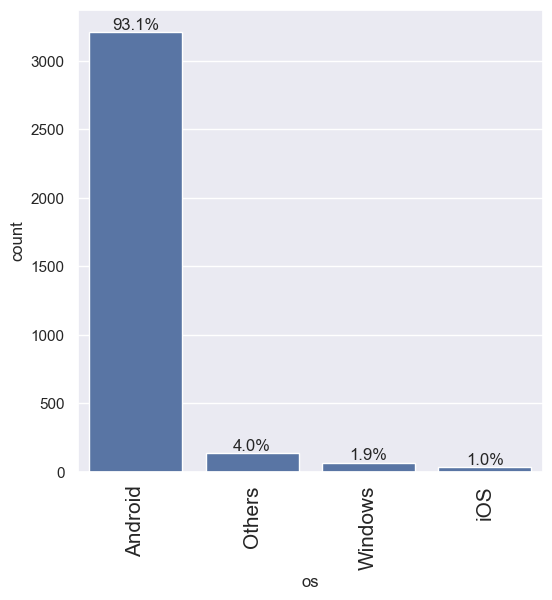

In [32]:
labeled_barplot(rcData, "os", perc=True, n=None)

- 93% of the used device market is dominated by Android devices

**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

Lets put brand on x axis and RAM on y axis to see the data distribution and plot a barplot. Also, based on univariate analysis for `ram` data was almost distrubiuted normally where mean and median were almost equal, so it will be safe to take the average 

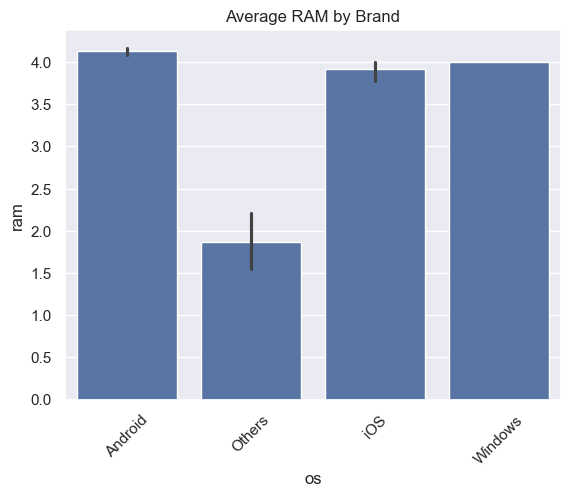

In [33]:
sns.barplot(x='os', y='ram', data=rcData, estimator=np.mean)
plt.title('Average RAM by Brand')
plt.xticks(rotation=45)
plt.show()

- Different brands have variations in RAM capacities
- Major brands like Android, iOS and Windows seems to be on an average using 4 GB RAM.
- Others brand is trending 2GB RAM

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

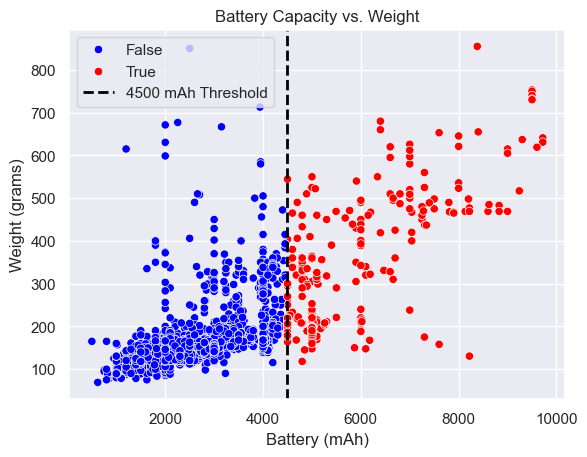

In [34]:
# scatterplot to visualize relationship between batteries and weight

sns.scatterplot(x=rcData['battery'], y=rcData['weight'], hue=rcData['battery'] >= 4500, palette={True: 'red', False: 'blue'})

plt.axvline(x=4500, color='black', linestyle='--', linewidth=2, label='4500 mAh Threshold')
plt.title('Battery Capacity vs. Weight')
plt.xlabel('Battery (mAh)')
plt.ylabel('Weight (grams)')
plt.legend()
plt.show()

In [35]:
# correlation between battery capacity and weight
correlation = rcData[['battery', 'weight']].corr()
correlation

battery    weight
battery  1.000000  0.703388
weight   0.703388  1.000000

- Trends shows higher the battery size leading to devices have higher weight (true - red dots)
- There is a strong positive relationship of 0.70 between these 2 variables which make sense

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [36]:
# count all the brands available for screen_size > 6
number_available = rcData[rcData['screen_size'] > 6]['os'].value_counts()
print(number_available)

os
Android    3212
Windows      67
Others       47
iOS          36
Name: count, dtype: int64


- With screen size greater than 6
   - There are 3212 devices which are running **`Android OS`**
   - There are 67 devices which are running **`Windows`**
   - There are 47 devices which are running **`Others`**
   - There are 36 devices which are running **`iOS`**

**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [37]:
# count all the brands available for screen_size > 8
device_distribution = rcData[rcData['selfie_camera_mp'] > 8]['os'].value_counts()
print(device_distribution)
device_distribution_percentage = rcData[rcData['selfie_camera_mp'] > 8]['os'].value_counts(normalize=True) * 100
device_distribution_percentage = device_distribution_percentage.apply(lambda x: f"{x:.2f}%")
print(device_distribution_percentage)

os
Android    653
Others       2
Name: count, dtype: int64
os
Android    99.69%
Others      0.31%
Name: proportion, dtype: object


- With screen_size greater than 8MP
  - Android has 653 devices and other have 2
  - Overall, Android is capturing 99.69% share. It makes sense too since Android used to make larger devices. 

**Which attributes are highly correlated with the normalized price of a used device?**

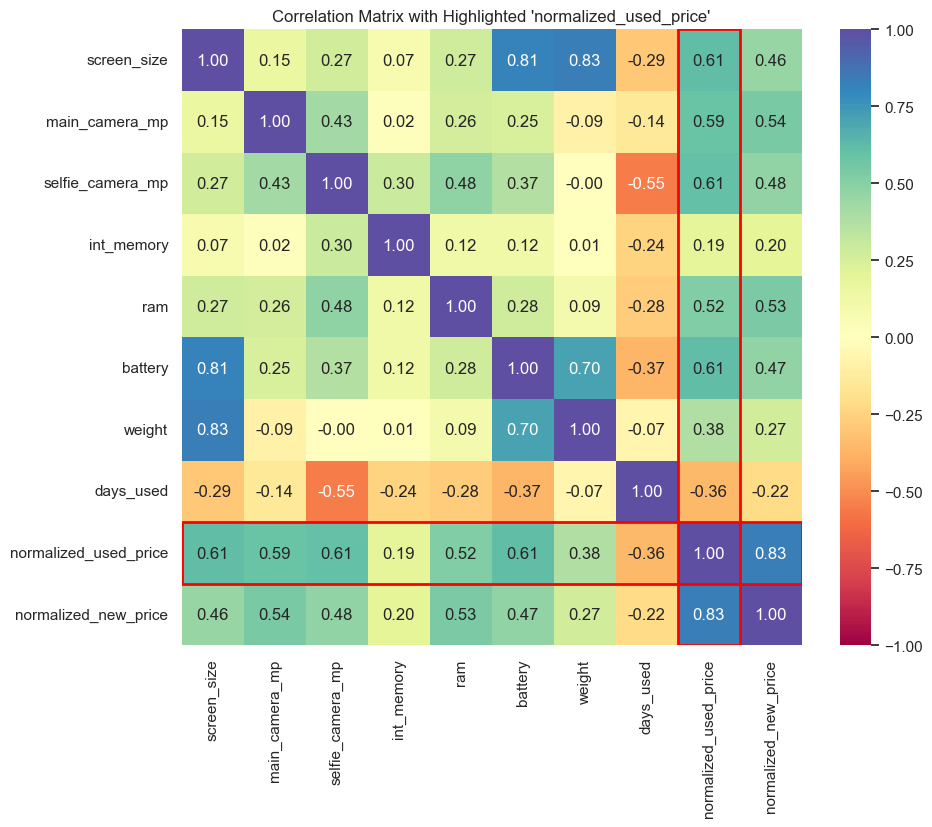

In [38]:
# create heatmap to understand correlation strength between all the x variables
num_cols = rcData.select_dtypes(include=np.number).columns.tolist()
# dropping release_year from list of numerical columns as they are not numerical in nature
num_cols.remove("release_year")

# Compute correlation
corr_matrix = rcData[num_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

# Highlight the "normalized_used_price" column & row
target_col = "normalized_used_price"
if target_col in num_cols:
    idx = num_cols.index(target_col)  # Get index for row & column
    
    # Draw a rectangle around the column (vertical box)
    rect_col = patches.Rectangle(
        (idx, 0),  # Bottom-left corner (column index, row start)
        1, len(num_cols),  # Width (1 column), Height (all rows)
        linewidth=2, edgecolor="red", facecolor="none"
    )
    
    # Draw a rectangle around the row (horizontal box)
    rect_row = patches.Rectangle(
        (0, idx),  # Bottom-left corner (row index, column start)
        len(num_cols), 1,  # Width (all columns), Height (1 row)
        linewidth=2, edgecolor="red", facecolor="none"
    )

    # Add rectangles to the heatmap
    ax.add_patch(rect_col)
    ax.add_patch(rect_row)

# Show plot
plt.title("Correlation Matrix with Highlighted 'normalized_used_price'")
plt.show()

**Attributes are highly correlated with the normalized price of a used device aka `normalized_used_price`** 

- **Positive correlation** : normalized_new_price, battery, selfie_camera_mp, main_camera_mp, ram, weight, int_memory and screen_size
- **Negative correlation** : days_used

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment**

In [39]:
# check missing values if any
rcData.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- There are missing values in the dataset as shown above and based on the univariate analysis done, here are the findings 
   - `main_camera_mp` has 179 missing values. it has no outliers
   - `selfie_camera_mp` has 2 missing values. it has outliers
   - `int_memory` has 4 missing values. it has very few outliers
   - `ram` has 4 missing values. it has few outliers but mean is almost same as median
   - `battery` has 6 missing values. it has few outliers.
   - `weight` has 7 missing values. it has many outliers.

<br> 


- Since there are `missing values and outliers`, I think, for **`imputing`**, it is safe to consider the **`median value`** for each variable listed above. Median is also safe bet because it does not have any impact due to outliers as its middle most observation and leave the outliers out statistically.

In [40]:
num_cols = rcData.select_dtypes(include=np.number).columns.tolist()
# dropping release_year from list of numerical columns as they are not numerical in nature
num_cols.remove("release_year")
# Other variables which do not have the missing values 
num_cols.remove("screen_size")
num_cols.remove("days_used")
num_cols.remove("normalized_used_price")
num_cols.remove("normalized_new_price")
# calculate medians for each variables having missing values
rcData[num_cols].median()

main_camera_mp         8.0
selfie_camera_mp       5.0
int_memory            32.0
ram                    4.0
battery             3000.0
weight               160.0
dtype: float64

- Replace the missing values for each variable with respect to their own median

In [41]:
# copy the data so that the original data remains intact
rcData_filled = rcData.copy()
# find columns with missing values
missing_columns = rcData_filled.columns[rcData_filled.isnull().any()]
#missing_columns
# impute missing values with median for each variables respectively.
for columns in missing_columns:
    rcData_filled[columns] = rcData_filled[columns].fillna(rcData_filled[columns].median())

# recheck missing values
rcData_filled.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- There are no missing values on the dataset **`rcData_filled`**

**Feature engineering (if needed)**

- Almost all the data i feel is making sense to create a machine learning data model except the release_year. I think for prediction, release_year is critical but we might want to baseline the release_year so that we can see the prediction trend on the normalized_used_price based on the baseline set.

In [42]:
rcData_filled["release_year"].value_counts()

release_year
2014    642
2013    570
2015    515
2019    446
2016    383
2018    322
2017    299
2020    277
Name: count, dtype: int64

- Data set has the release_year value from 2014 thru 2020. lets set the baseline as 2021 and create a new `feature varialbe` and call it `release_age`
- compute **`release_age`** as **`2021 - release_year`** 
- we also do not need `release_year` , dropping this will help optimize data model

In [43]:
# add new feature as release_age
rcData_filled["release_age"] = 2021 - rcData_filled["release_year"]
# drop release_year column (axis=1) from the dataset, inPlace=True
rcData_filled.drop("release_year", axis=1, inplace=True)

In [44]:
# Check for missing values in the 'release_age' column
missing_values = rcData_filled["release_age"].isnull().sum()
print(f"Missing values in 'release_age': {missing_values}\n")

# Display value counts for 'release_age'
print("Value counts for 'release_age':")
print(rcData_filled["release_age"].value_counts(), "\n")

# Display DataFrame info
print("Dataset Information:")
rcData_filled.info()

Missing values in 'release_age': 0

Value counts for 'release_age':
release_age
7    642
8    570
6    515
2    446
5    383
3    322
4    299
1    277
Name: count, dtype: int64 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used  

- **`release_age`** has been added as a `new feature` successfully in the dataset **`rcData_filled`**
- **`release_year`** has been dropped as well from the dataset **`rcData_filled`**

**Outlier detection and treatment (if needed)**

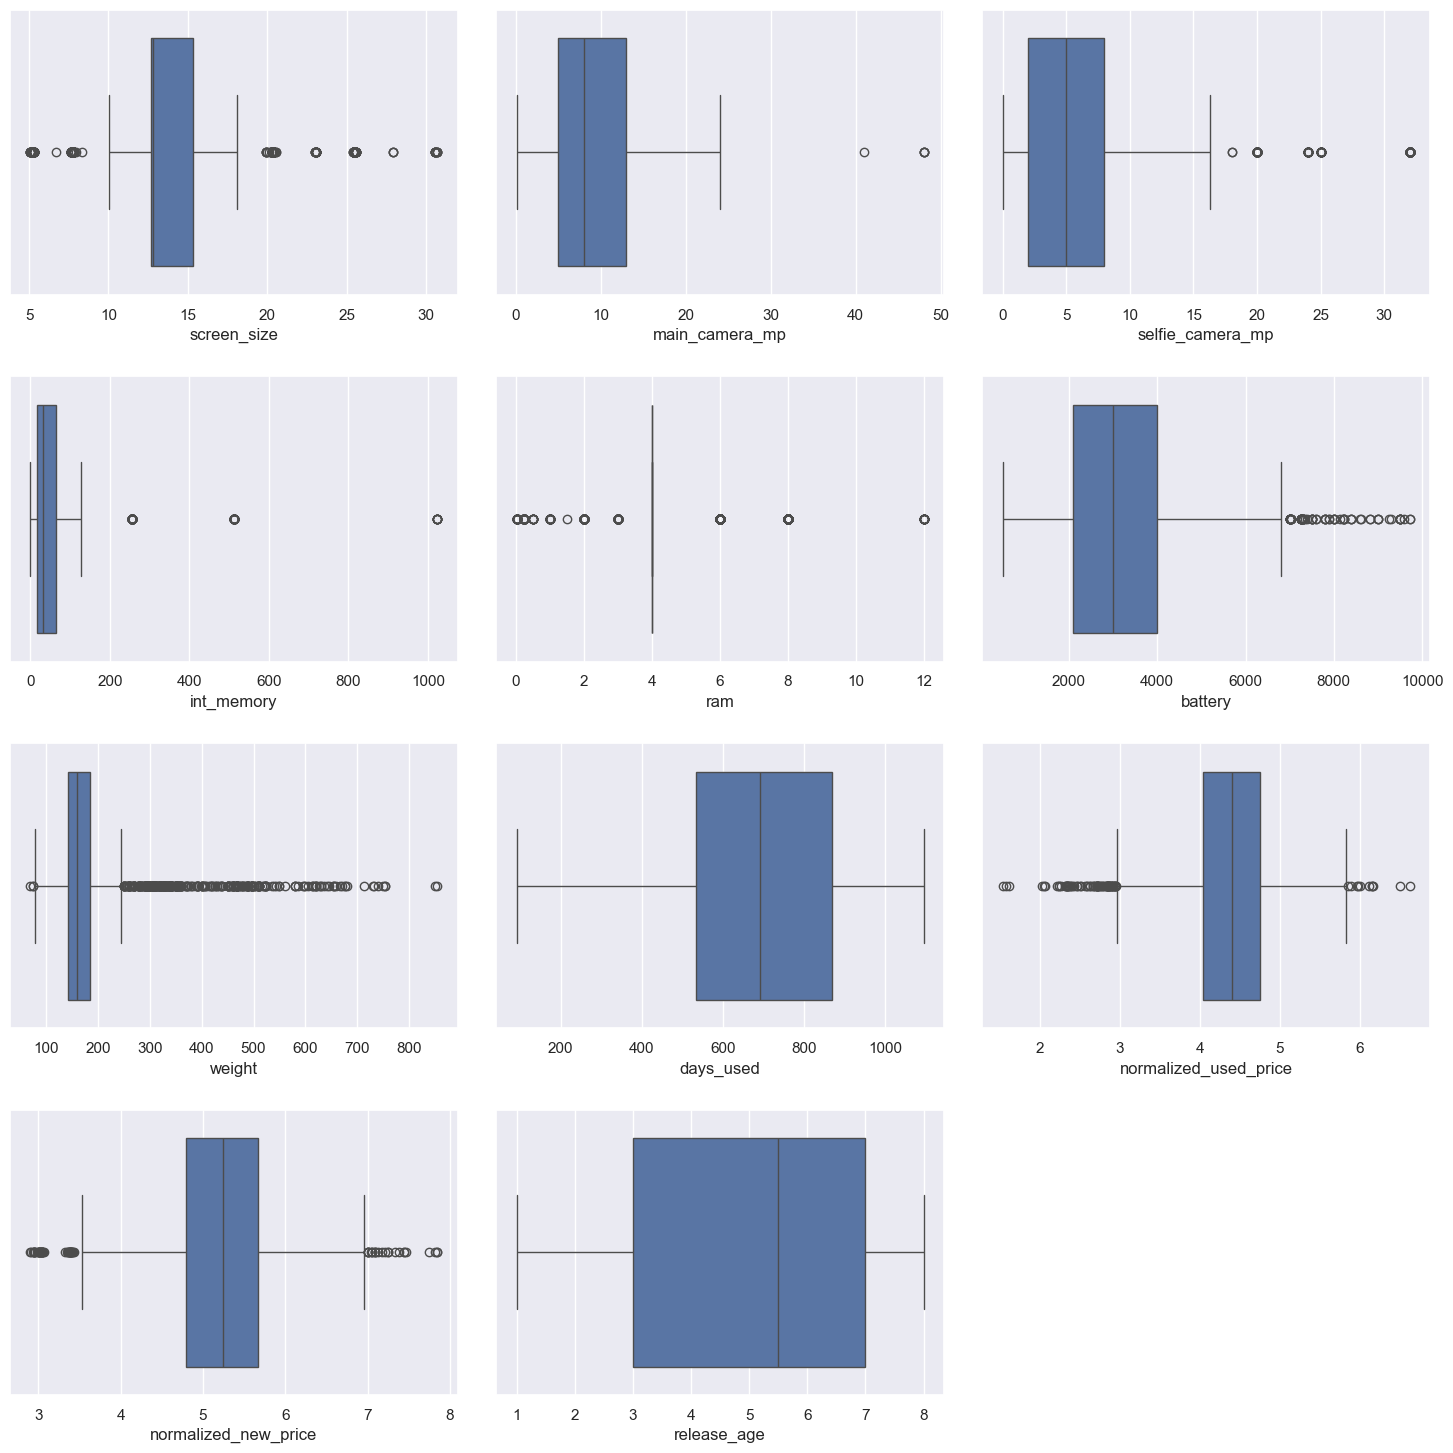

In [45]:
# outlier detection using boxplot
num_cols = rcData_filled.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=rcData_filled, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [46]:
# Compute statistics before handling outliers
num_cols = rcData_filled.select_dtypes(include=np.number).columns.tolist()
stats_before = rcData_filled[num_cols].describe()
stats_before

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3454.000000       3454.000000  3454.000000   
mean     13.713115        9.384534          6.553329    54.546957   
std       3.805280        4.700148          6.968453    84.926611   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%      15.340000       13.000000          8.000000    64.000000   
max      30.710000       48.000000         32.000000  1024.000000   

               ram      battery       weight    days_used  \
count  3454.000000  3454.000000  3454.000000  3454.000000   
mean      4.036080  3133.170961   182.705761   674.869716   
std       1.364314  1298.565062    88.329494   248.580166   
min       0.020000   500.000000    69.000000    91.000000   
25%       4.000000  2100.000000   142.000000   533.500000   
50%       4.000000  3000.000000   160.000000   690.500000   
75%       4.000000  4000.000000   185.000000   868.750000   
max      12.000000  9720.000000   855.000000  1094.000000   

       normalized_used_price  normalized_new_price  release_age  
count            3454.000000           3454.000000  3454.000000  
mean                4.364712              5.233107     5.034742  
std                 0.588914              0.683637     2.298455  
min                 1.536867              2.901422     1.000000  
25%                 4.033931              4.790342     3.000000  
50%                 4.405133              5.245892     5.500000  
75%                 4.755700              5.673718     7.000000  
max                 6.619433              7.847841     8.000000

In [47]:
# Compute statistics before handling outliers

# Select numeric columns
num_cols = rcData_filled.select_dtypes(include=[np.number]).columns.tolist()

# Compute statistics before removing outliers
stats_before = rcData_filled[num_cols].describe()

# Calculate Q1, Q3, and IQR for each numeric column
Q1 = rcData_filled[num_cols].quantile(0.25)
Q3 = rcData_filled[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers (col-wise for each column)
rcData_filled_no_outliers = rcData_filled.copy()

# filter rcData_filled with condition that checks whether the values in that column are within the bounds calculated by the IQR 
for col in num_cols:
    rcData_filled_no_outliers = rcData_filled_no_outliers[
        (rcData_filled_no_outliers[col] >= (Q1[col] - 1.5 * IQR[col])) & 
        (rcData_filled_no_outliers[col] <= (Q3[col] + 1.5 * IQR[col]))
    ]


# Print the shape of the dataframes before and after removing outliers
print("Shape of data before removing outliers:", rcData_filled.shape)
print("Shape of data after removing outliers:", rcData_filled_no_outliers.shape)

# Calculate the difference in the number of rows
difference = len(rcData_filled) - len(rcData_filled_no_outliers)
print(f"Number of rows removed: {difference}")


Shape of data before removing outliers: (3454, 15)
Shape of data after removing outliers: (2263, 15)
Number of rows removed: 1191


- Filtering outliers within the IQR boundry, is actually removing the data (rows). I am not sure if this is a good idea but
   - lets draw histogram before and after handling the outliers
   - Good part, i have created another dataset **`rcData_filled_no_outliers`** so we can decide later which dataset to use **`rcData_filled`** OR **`rcData_filled_no_outliers`**

**Create a histogram for all the variables before and after outlier treatment and analyze if treating outlier will actually help the model**

In [48]:
def outlier_histogram_compare(col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(rcData_filled[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title("Before Handling Outliers")

    sns.histplot(rcData_filled_no_outliers[col], bins=30, kde=True, ax=axes[1])
    axes[1].set_title("After Handling Outliers")

    plt.show()
    

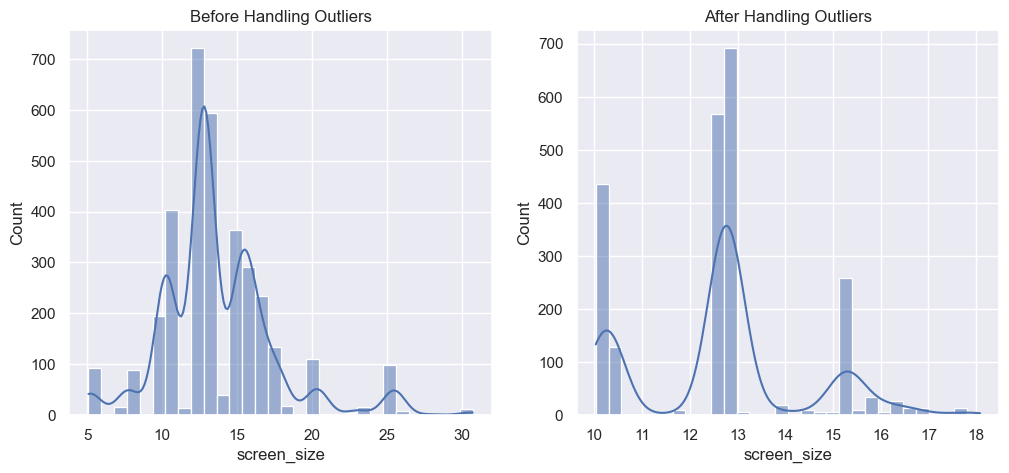

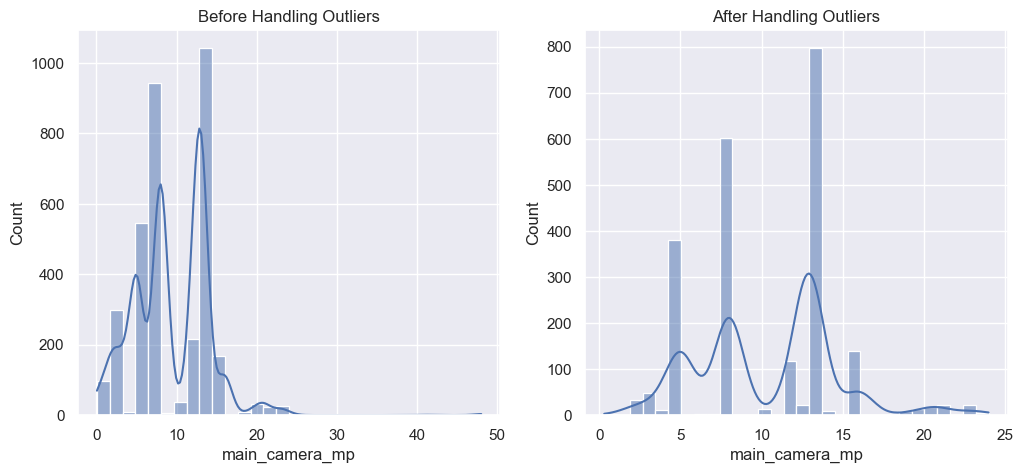

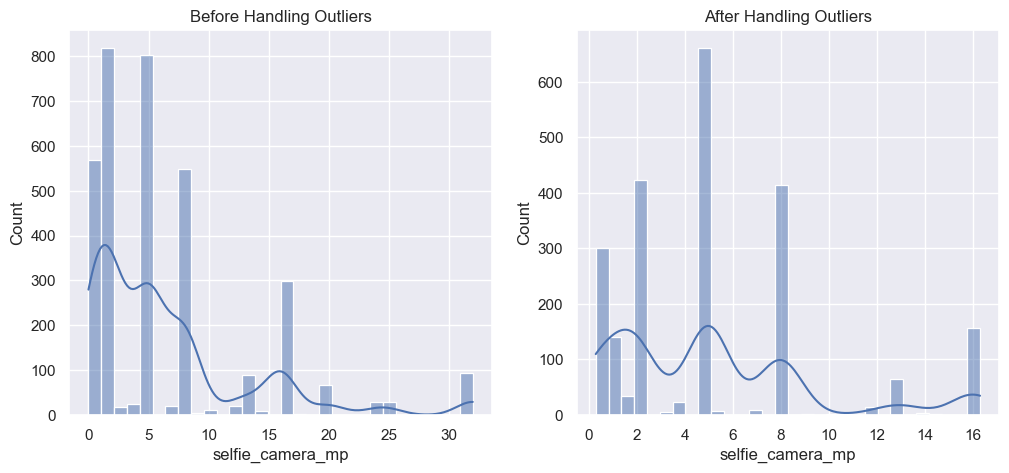

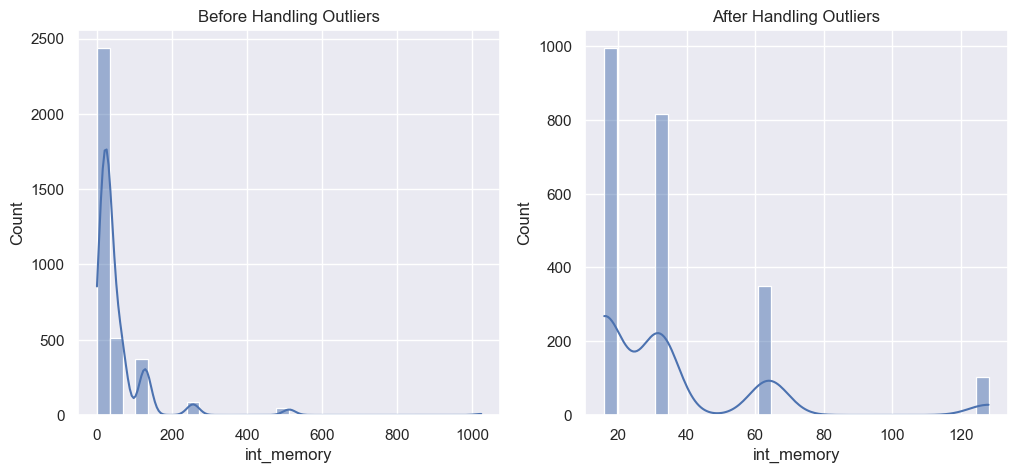

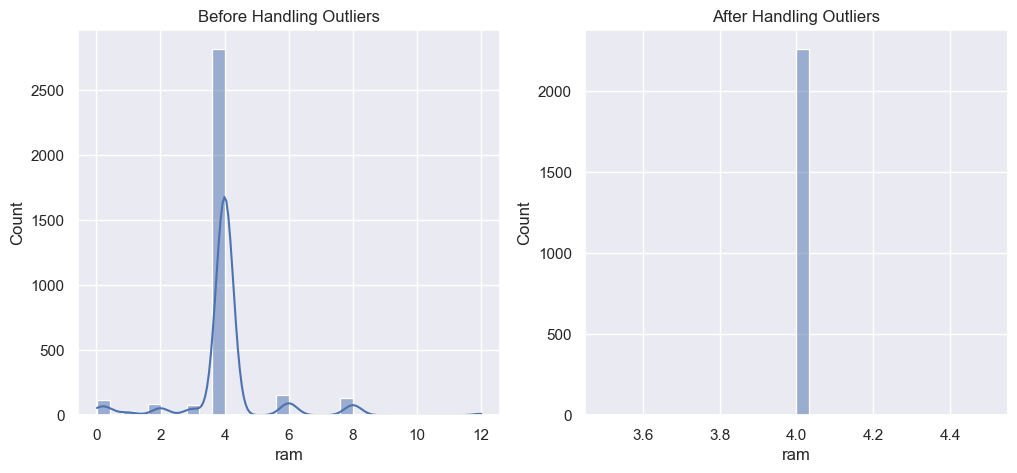

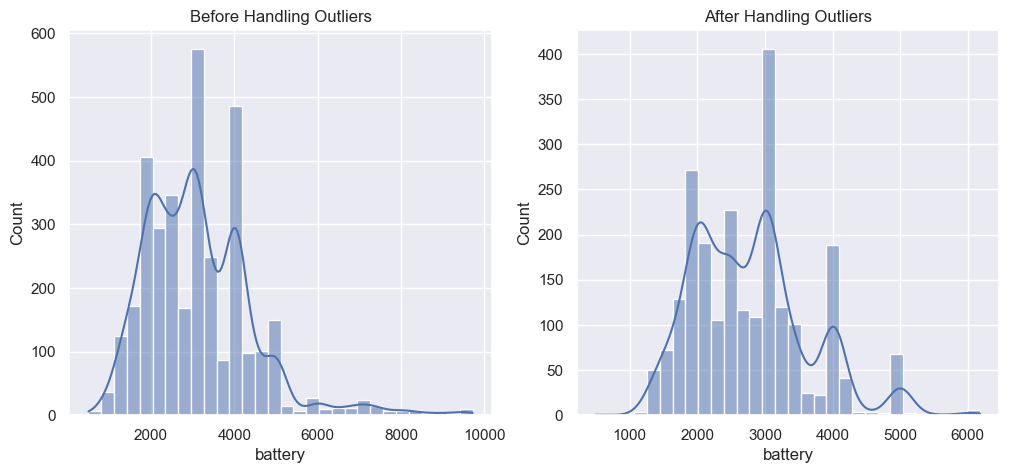

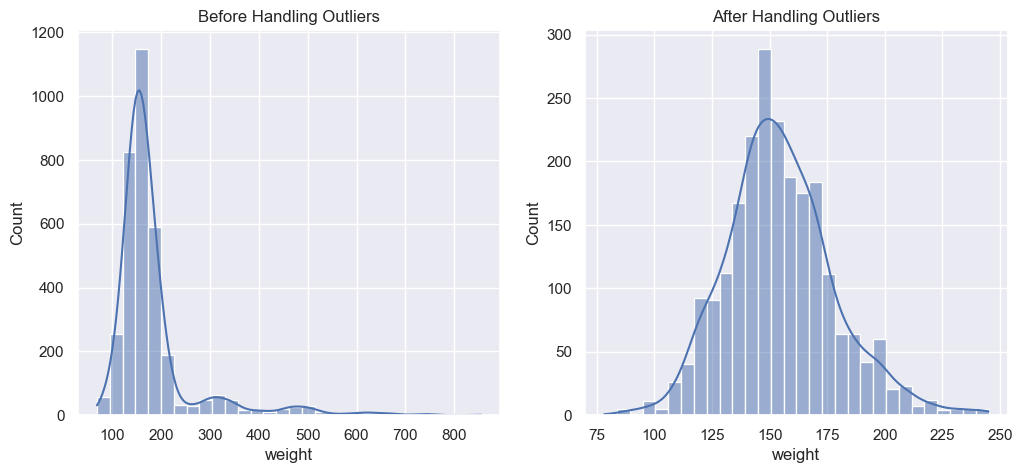

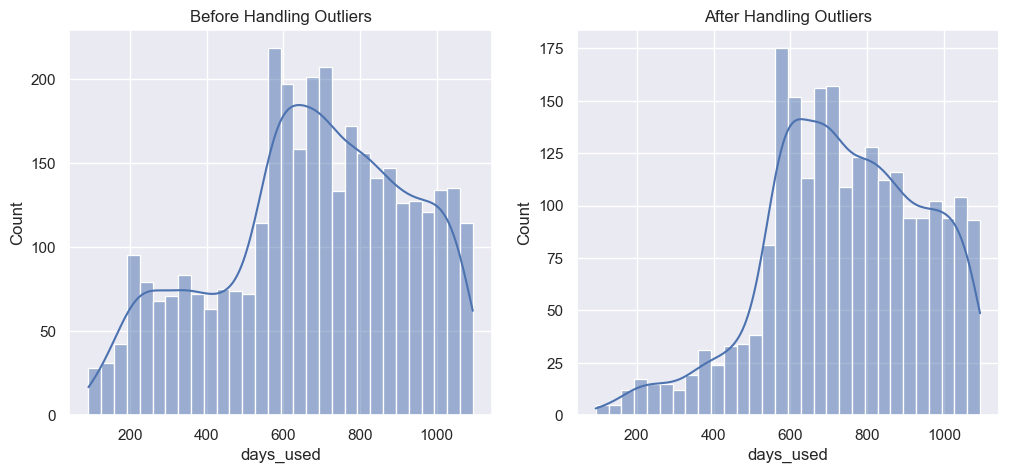

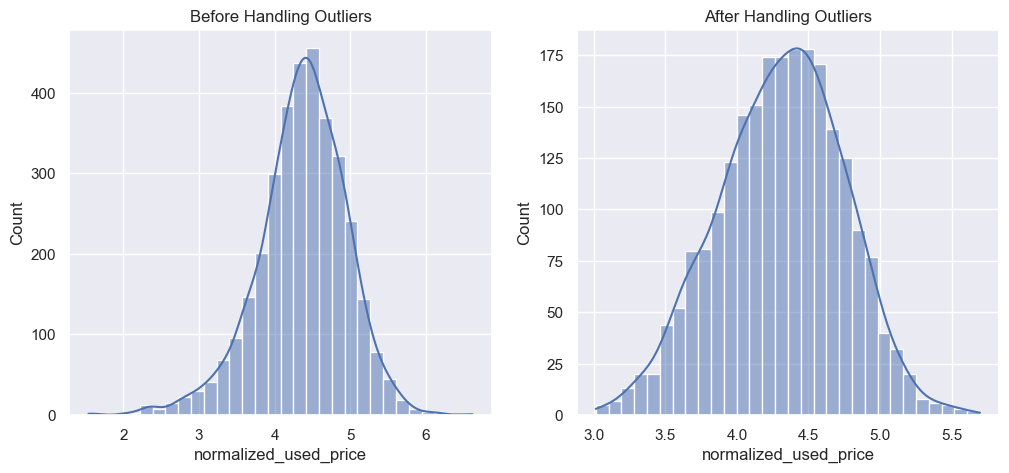

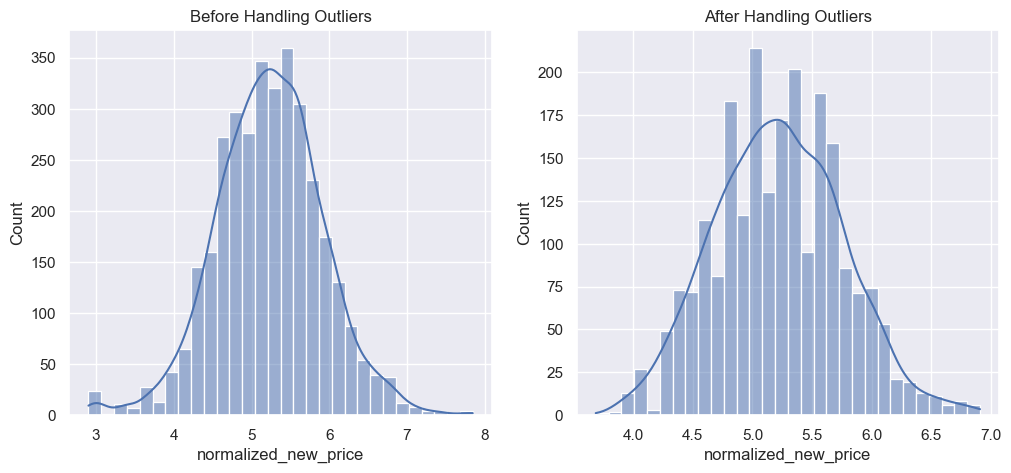

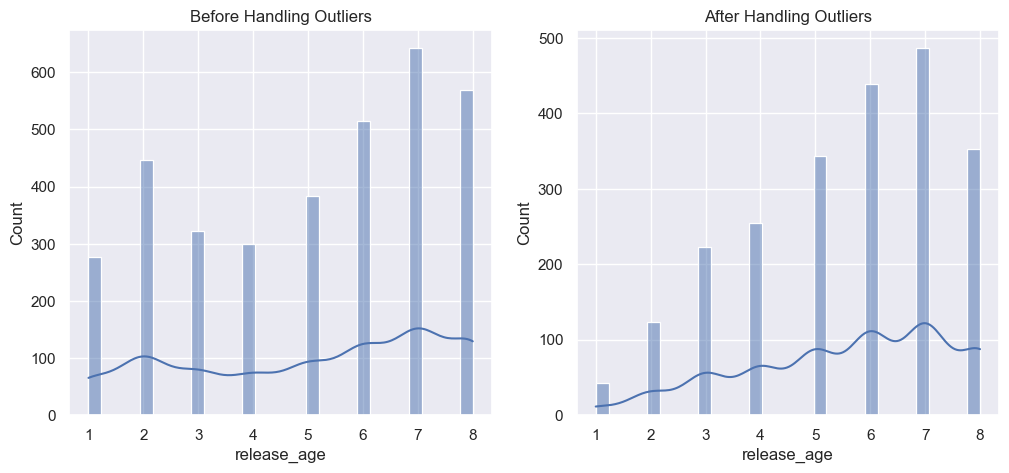

In [49]:
outlier_histogram_compare("screen_size")
outlier_histogram_compare("main_camera_mp")
outlier_histogram_compare("selfie_camera_mp")
outlier_histogram_compare("int_memory")
outlier_histogram_compare("ram")
outlier_histogram_compare("battery")
outlier_histogram_compare("weight")
outlier_histogram_compare("days_used")
outlier_histogram_compare("normalized_used_price")
outlier_histogram_compare("normalized_new_price")
outlier_histogram_compare("release_age")

**At this point, I am not very sure what to do next. For now, I will not handle the outlier due to 2 reasons broadly**
- Data size is reduced significantly
   - data shape before (3454, 15) and data size after (2263, 15). Difference is 1191. Almost reduced by 35%
   - Not confident enough on how to handle the outliers

**Preparing data for modeling**

- Drop the column `brand_name` as it contain too many unique values, and can be excluded from modeling
- Handle the categeorical varaible like `4g`, `5g` by creating dummies variable using panda
- Handle the string Object `os` by create dummies variable using panda
- Before we proceed to build a model, we'll have to encode categorical features aks `one hot encoding`
- Split the data into train and test to be able to evaluate the model that we build on the train data
- Based on the business problem, we need to predict 'normalized_used_price', so this can be set to y.
- All other variables or aka `features` can be set to X

In [50]:
# create a final data model for machine learning model to use in model creation
rcData_final = rcData_filled.copy()
rcData_final.drop(["brand_name"], axis=1, inplace=True)

In [51]:
# defining X and y variables
X = rcData_final.drop(["normalized_used_price"], axis=1)
y = rcData_final["normalized_used_price"]

In [52]:
print(X.head())
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        25.50  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   release_age  
0            1  
1            1  
2            1  
3            1  
4            1  
0    4.307572
1    5.162097
2    5.111

In [53]:
# let's add the intercept to data
X = sm.add_constant(X)

In [54]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  release_age  os_Others  \
0   3020.0   146.0        127              4.715100            1      False   
1   4300.0   213.0        325              5.519018            1      False   
2   4200.0   213.0        162              5.884631            1      False   
3   7250.0   480.0        345              5.630961            1      False   
4   5000.0   185.0        293              4.947837            1      False   

   os_Windows  os_iOS  4g_yes  5g_yes  
0       False   False    True   False  
1       False   False    True    True  
2       False   False    True    True  
3       False   False    True    True  
4       False   False    True   False

In [55]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  release_age  os_Others  \
0   3020.0   146.0      127.0              4.715100          1.0        0.0   
1   4300.0   213.0      325.0              5.519018          1.0        0.0   
2   4200.0   213.0      162.0              5.884631          1.0        0.0   
3   7250.0   480.0      345.0              5.630961          1.0        0.0   
4   5000.0   185.0      293.0              4.947837          1.0        0.0   

   os_Windows  os_iOS  4g_yes  5g_yes  
0         0.0     0.0     1.0     0.0  
1         0.0     0.0     1.0     1.0  
2         0.0     0.0     1.0     1.0  
3         0.0     0.0     1.0     1.0  
4         0.0     0.0     1.0     0.0

## EDA

- It is a good idea to explore the data once again after manipulating it.

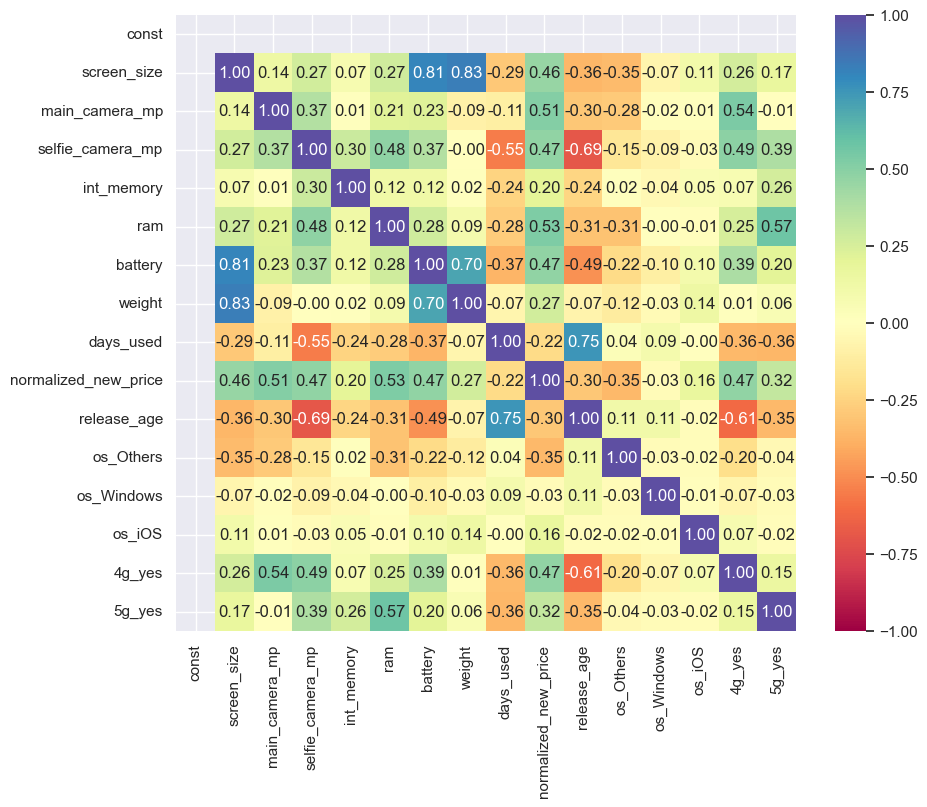

In [56]:
# create heatmap to understand correlation strength between all the X variables 
num_cols = X.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(X[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Correlation seems to be intact. 

## Model Building - Linear Regression

In [57]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [81]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037
Number of rows in train data = 2417
Number of rows in test data = 1037


In [59]:
# Instantiate OLS (Ordinary Least Squares (OLS) regression and fit the X_train data
olsmod = sm.OLS(y_train, X_train)
# fit the model
olsresult = olsmod.fit()
# review the results
print(olsresult.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     847.8
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:00:18   Log-Likelihood:                 95.399
No. Observations:                   2417   AIC:                            -158.8
Df Residuals:                       2401   BIC:                            -66.15
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Interpretation of R-squared**

- The R-squared value tells that the model can explain 84.1% of the variance in the training set. This may be due to
  - many feature varaibles present in the dataset
  - data structured very well
  - has multicollinearity (where some variables are redundant).
- **`Next Step`** lets check model performance againsts the test data and compare the performance between train and test data

## Model Performance Check

Let's check the performance of the model using different metrics.

* Use metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* Define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
<br>
* Create a function to print out all the above metrics in one go.

In [60]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
# model_performance_regression(olsresult, X_train, y_train)

def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [61]:
#!pip install PrettyTable

In [62]:
def print_table(olsmodel_train_perf, olsmodel_test_perf):
    table = PrettyTable()

    # Set field names (columns)
    table.field_names = ["Metric", "Train Performance", "Test Performance"]

    # Add rows
    for metric in olsmodel_train_perf.columns:
        train_value = round(olsmodel_train_perf[metric][0], 3)
        test_value = round(olsmodel_test_perf[metric][0], 3)
        table.add_row([metric, train_value, test_value])
    print(table)

In [63]:
# check performance

olsmodel_train_perf = model_performance_regression(olsresult, X_train, y_train)
olsmodel_test_perf = model_performance_regression(olsresult, X_test, y_test)
print_table(olsmodel_train_perf, olsmodel_test_perf)

+----------------+-------------------+------------------+
|     Metric     | Train Performance | Test Performance |
+----------------+-------------------+------------------+
|      RMSE      |       0.233       |      0.237       |
|      MAE       |       0.183       |      0.183       |
|   R-squared    |       0.841       |      0.844       |
| Adj. R-squared |        0.84       |      0.842       |
|      MAPE      |        4.39       |      4.458       |
+----------------+-------------------+------------------+


**Observation**
- `R-squared` for `train dataset` and for `test dataset` is also same, and so,model is able to generalize well
- `Adj. R-squared` is similar as well, so it seems that model is valid
- The training $R^2$ is 84%, so the model is not underfitting
- The train and test RMSE and MAE are comparable, so the model is not overfitting either
- MAE suggests that the model can predict `normalized_used_price` within a mean error of 0.18 on the test data
- MAPE of 4.45 on the test data means that model is able to predict within 4.45% of the `normalized_used_price`

**Check `Multicollinearity`**

**`VIF CHECK`** **General Rule of Thumb**: if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [64]:
# let's check the VIF of the X_train (features)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = []  # List to store VIF values
columns = X_train.columns  # Get column names

# Compute VIF for each feature
for i in range(len(columns)):
    vif = variance_inflation_factor(X_train.values, i)
    vif_values.append(vif)

# Create a Pandas Series with column names as index
vif_x_train = pd.Series(vif_values, index=columns)


print(vif_x_train)

const                   125.768700
screen_size               7.257522
main_camera_mp            1.924868
selfie_camera_mp          2.572363
int_memory                1.247150
ram                       2.103621
battery                   3.835618
weight                    6.120544
days_used                 2.589619
normalized_new_price      2.658599
release_age               4.613026
os_Others                 1.475205
os_Windows                1.023196
os_iOS                    1.089057
4g_yes                    2.269786
5g_yes                    1.762858
dtype: float64


**Observation** VIF is within the range, less than 10, so it seems X_train data have **`No Multicollinearity`**

**Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.**

In [65]:
print(olsresult.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     847.8
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:00:18   Log-Likelihood:                 95.399
No. Observations:                   2417   AIC:                            -158.8
Df Residuals:                       2401   BIC:                            -66.15
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**As observed in the above model (olsresult): Following features have p-value greater than 0.05, so, we can drop it because it is not significant in predicting 'normalized_used_price'**
- `int_memory`  
- `battery`  
- `days_used` 
- `os_Windows`  
- `os_iOS`  
- `5g_yes`  
- `os_Others`  

However, we need to this one by one and check $R^2$

- Remove `5g_yes` and re-evaluate $R^2$

In [66]:
# drop 5g_yes feature since it has the highest p value among other high p values (compared to 0.05)
X_train_1 = X_train.drop(["5g_yes"], axis=1)
olsresults_1 = sm.OLS(y_train, X_train_1)
olsresults_1 = olsresults_1.fit()
print(olsresults_1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     908.7
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:00:18   Log-Likelihood:                 95.273
No. Observations:                   2417   AIC:                            -160.5
Df Residuals:                       2402   BIC:                            -73.69
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observation** After dropping `5g_yes`, `R-squared` and `Adj. R-squared` has not changed at all. This shows that this variable did not have much predictive power

- Remove `os_Windows` and re-evaluate $R^2$

In [67]:
# drop os_Windows feature since it has the highest p value among other high p values (compared to 0.05)
X_train_2 = X_train_1.drop(["os_Windows"], axis=1)
olsresults_2 = sm.OLS(y_train, X_train_2)
olsresults_2 = olsresults_2.fit()
print(olsresults_2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     978.7
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:00:18   Log-Likelihood:                 94.990
No. Observations:                   2417   AIC:                            -162.0
Df Residuals:                       2403   BIC:                            -80.92
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observation** After dropping `os_Windows`, `R-squared` and `Adj. R-squared` has not changed at all. This shows that this variable did not have much predictive power

- Remove `days_used` and re-evaluate $R^2$

In [68]:
# drop days_used feature since it has the highest p value among other high p values (compared to 0.05)
X_train_3 = X_train_2.drop(["days_used"], axis=1)
olsresults_3 = sm.OLS(y_train, X_train_3)
olsresults_3 = olsresults_3.fit()
print(olsresults_3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1060.
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:00:18   Log-Likelihood:                 94.184
No. Observations:                   2417   AIC:                            -162.4
Df Residuals:                       2404   BIC:                            -87.09
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observation** After dropping `days_used`, `R-squared` and `Adj. R-squared` has not changed at all. This shows that this variable did not have much predictive power

- Remove `os_iOS` and re-evaluate $R^2$

In [69]:
# drop os_iOS feature since it has the highest p value among other high p values (compared to 0.05)
X_train_4 = X_train_3.drop(["os_iOS"], axis=1)
olsresults_4 = sm.OLS(y_train, X_train_4)
olsresults_4 = olsresults_4.fit()
print(olsresults_4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1156.
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:00:18   Log-Likelihood:                 93.213
No. Observations:                   2417   AIC:                            -162.4
Df Residuals:                       2405   BIC:                            -92.94
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observation** After dropping `os_iOS`, `R-squared` and `Adj. R-squared` has not changed at all. This shows that this variable did not have much predictive power

- Remove `int_memory` and re-evaluate $R^2$

In [70]:
# drop int_memory feature since it has the highest p value among other high p values (compared to 0.05)
X_train_5 = X_train_4.drop(["int_memory"], axis=1)
olsresults_5 = sm.OLS(y_train, X_train_5)
olsresults_5 = olsresults_5.fit()
print(olsresults_5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1271.
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:00:19   Log-Likelihood:                 92.460
No. Observations:                   2417   AIC:                            -162.9
Df Residuals:                       2406   BIC:                            -99.23
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observation** After dropping `int_memory`, `R-squared` and `Adj. R-squared` has not changed at all. This shows that this variable did not have much predictive power

- Remove `battery` and re-evaluate $R^2$

In [71]:
# drop battery feature since it has the highest p value among other high p values (compared to 0.05)
X_train_6 = X_train_5.drop(["battery"], axis=1)
olsresults_6 = sm.OLS(y_train, X_train_6)
olsresults_6 = olsresults_6.fit()
print(olsresults_6.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1411.
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:00:19   Log-Likelihood:                 91.272
No. Observations:                   2417   AIC:                            -162.5
Df Residuals:                       2407   BIC:                            -104.6
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observation** After dropping `battery`, `R-squared` and `Adj. R-squared` has not changed at all. This shows that this variable did not have much predictive power

***Summary*** 

After removing the following features, r-squared and adj. r-squared remains same with the original r-squared and adj r-squared. 

- `int_memory`  
- `battery` 
- `days_used`  
- `os_Windows`  
- `os_iOS`
- `5g_yes`

**We can `conclude` that these features / predictors `do not` have any `predictive power`**

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Test for Linearity and Independence**

In [73]:
df_prediction = pd.DataFrame()

df_prediction["Original Values (Actual)"] = y_train.values.flatten()  # actual values - Truth
df_prediction["Fitted Values (Prediction)"] = olsresults_6.fittedvalues.values  # predicted values
df_prediction["Residuals (Original - Fitted)"] = olsresults_6.resid.values  # residuals

df_prediction.head()

Original Values (Actual)  Fitted Values (Prediction)  \
0                  4.087488                    3.859925   
1                  4.448399                    4.593407   
2                  4.315353                    4.286824   
3                  4.282068                    4.251242   
4                  4.456438                    4.482943   

   Residuals (Original - Fitted)  
0                       0.227563  
1                      -0.145008  
2                       0.028529  
3                       0.030826  
4                      -0.026504

**Linearity** - A straight-line relationship between two variables, predictor variables (features) must have a linear relation with the dependent variable.

**Make a plot of `fitted values vs residuals`**. 

**Check: If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.**

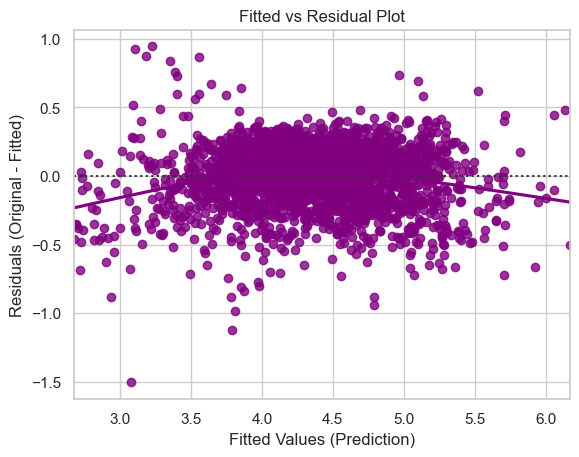

In [74]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(data=df_prediction, x="Fitted Values (Prediction)", y="Residuals (Original - Fitted)", color="purple", lowess=True)
plt.xlabel("Fitted Values (Prediction)")
plt.ylabel("Residuals (Original - Fitted)")
plt.title("Fitted vs Residual Plot")
plt.show()

**Observation** 

- Plot shows almost `NO` patterns followed. We can conclude that the model is linear. however, to be very clear, we can do another check and see if there are any pattern.

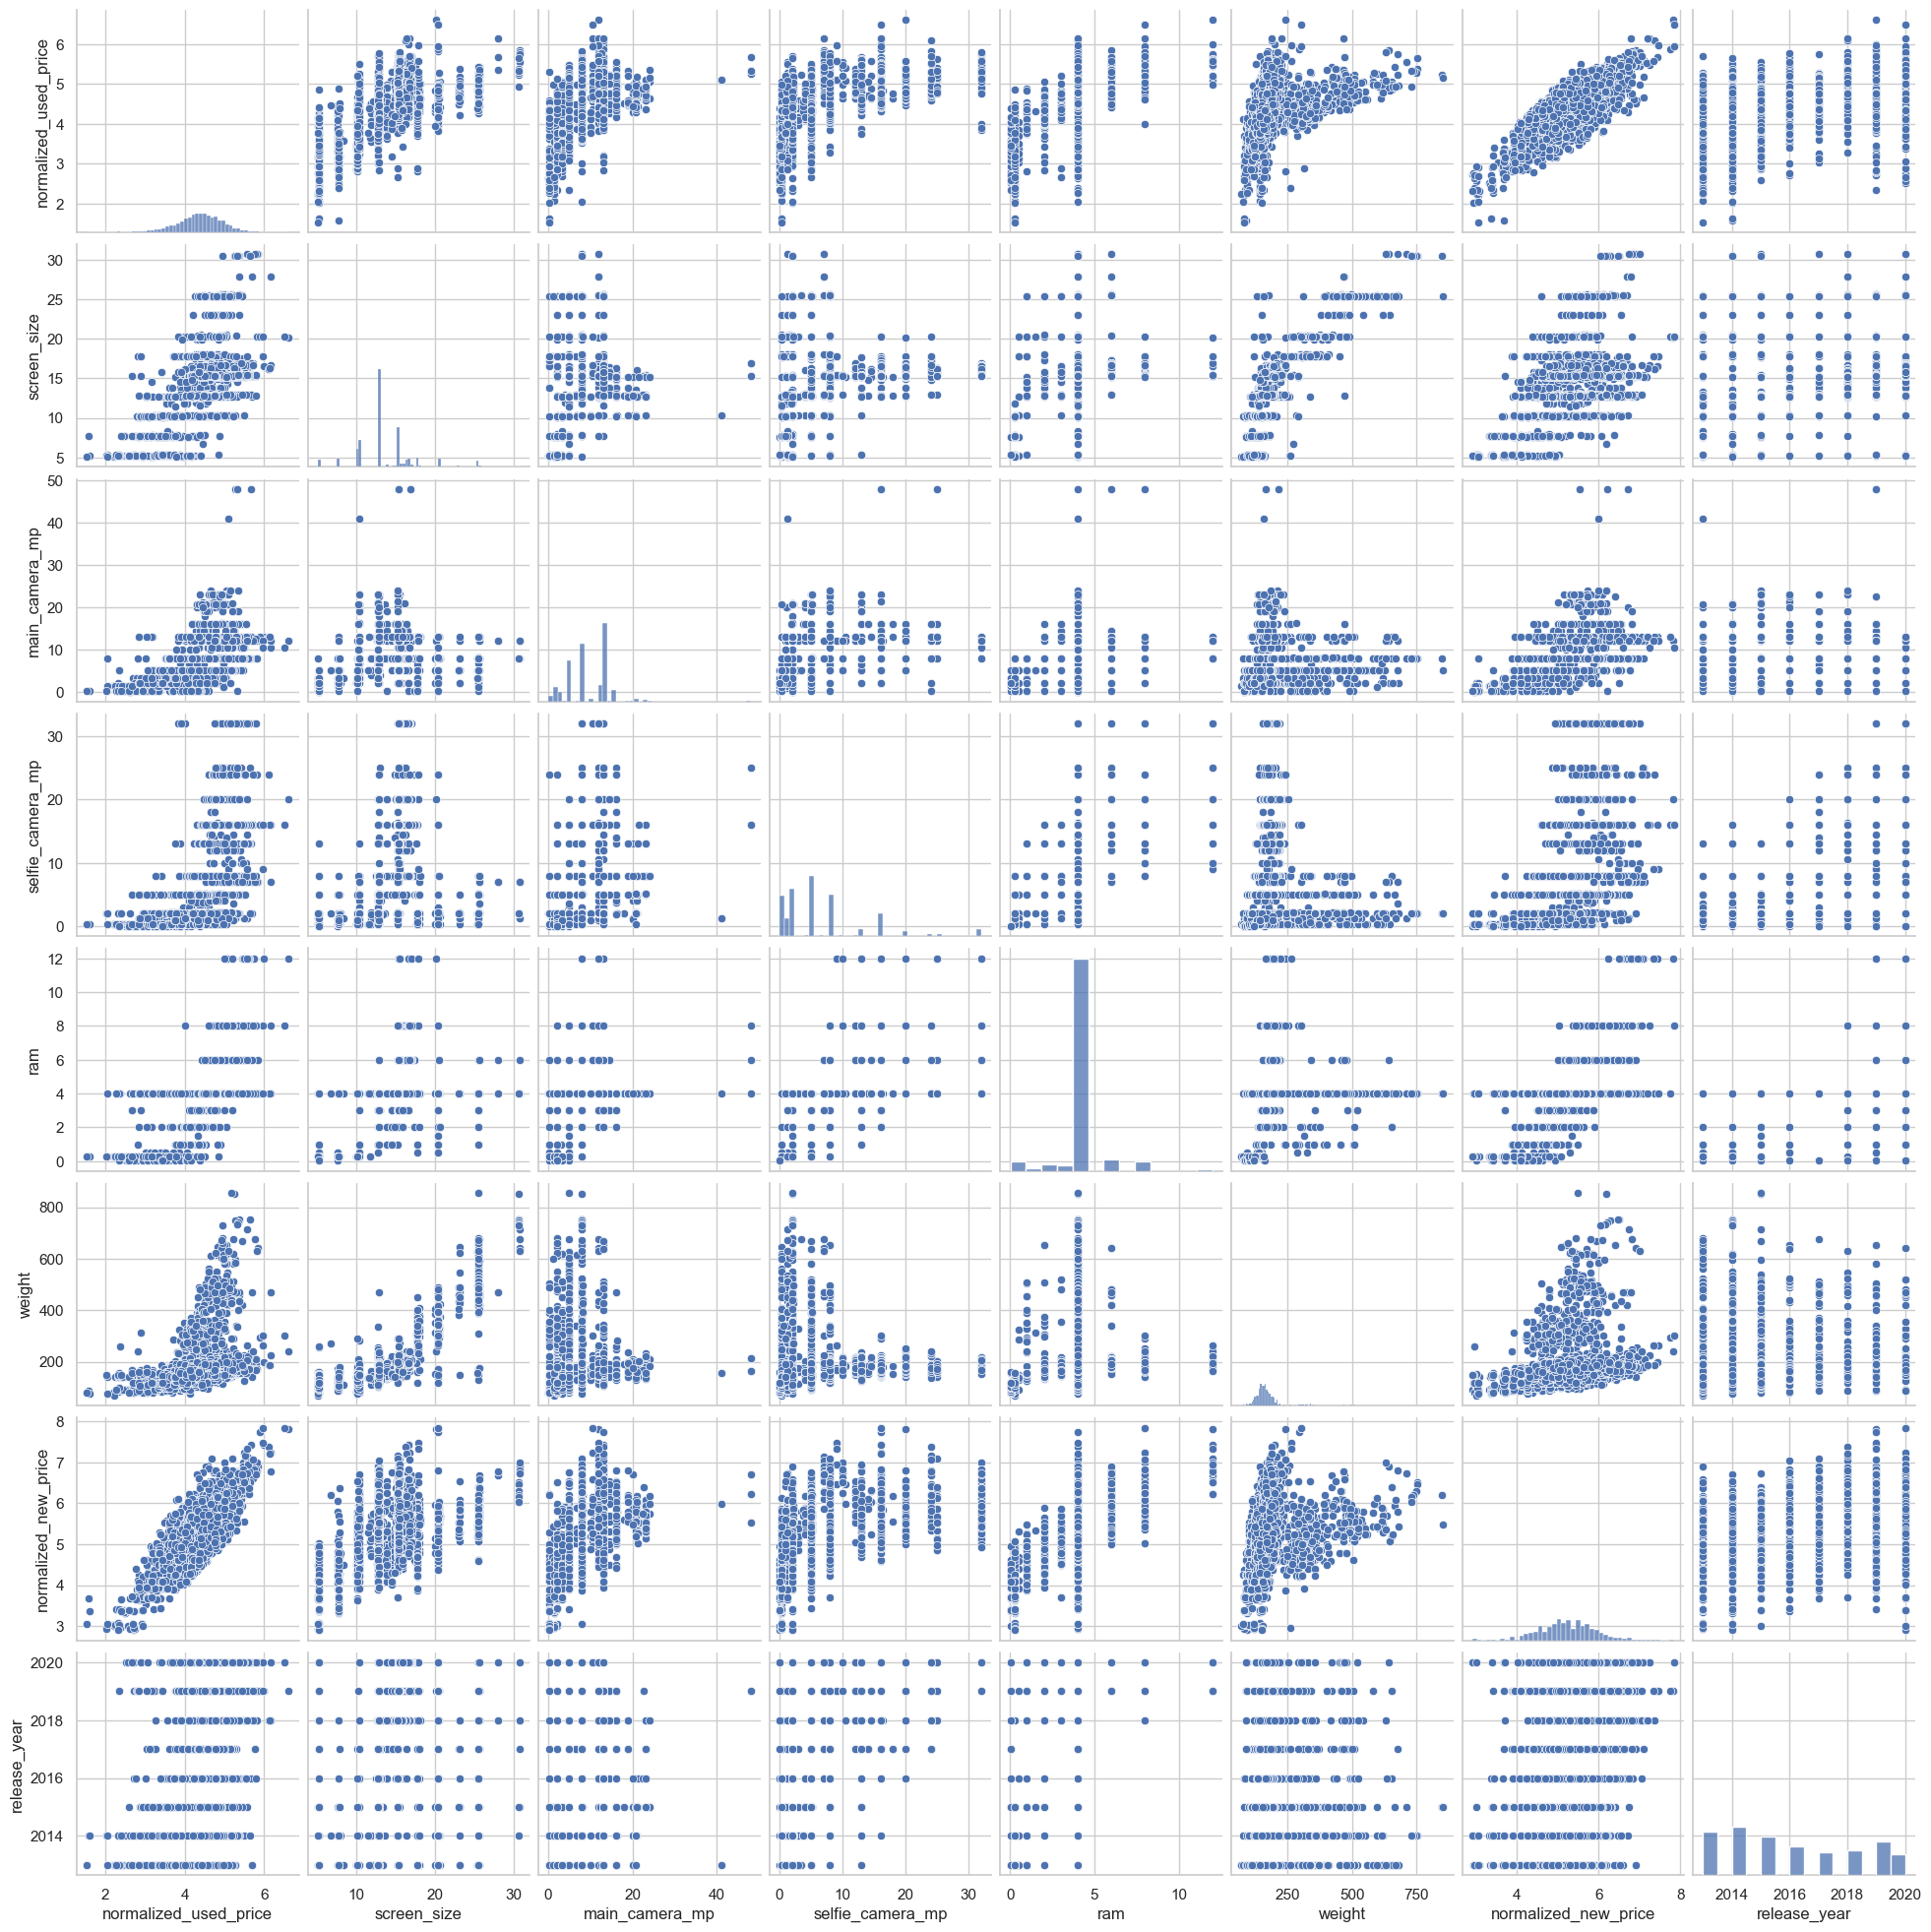

In [75]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(
    rcData[["normalized_used_price", "screen_size", "main_camera_mp", "selfie_camera_mp", "ram", "weight", "normalized_new_price", "release_year"]])
plt.show()

**I see that the 'weight' column has a slight nonlinear relationship with 'normalized_used_price'. We can transform the 'weight' column.**

In [82]:
# using square or cube transformation for weight feature to see if increase/decrease r-squared adj. r-squared
X_train_7 = X_train_6.copy()
#X_train_8["weight_sq"] = np.power(X_train_8["weight"], 2) # square of weight
X_train_7["weight_cube"] = np.power(X_train_7["weight"], 3) # cube of weight
# let's create a model with the transformed data
olsresults_7 = sm.OLS(y_train, X_train_7)
olsresults_7 = olsresults_7.fit()
print(olsresults_7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1282.
Date:                   Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                           20:16:47   Log-Likelihood:                 101.21
No. Observations:                   2417   AIC:                            -180.4
Df Residuals:                       2406   BIC:                            -116.7
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observation** - 

R-suared improved by 0.02. I feel we can leave it here. Over optimizing the model may not be a good idea in real business problem. Its good idea though to check and try transformation just incase if it improves the performance.

**We can conclude**

**`X_train_6`** --> is a training dataset so far <br>
**`olsresults_6`** --> is good predictive model yet so far based on the X_train_6 dataset.

**TEST FOR NORMALITY**

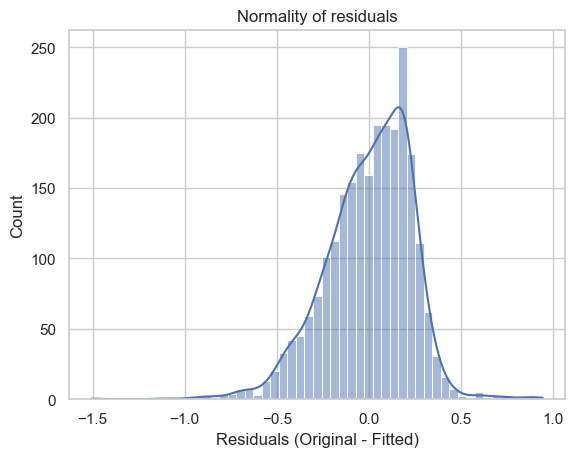

In [77]:
sns.histplot(df_prediction["Residuals (Original - Fitted)"], kde=True)
plt.title("Normality of residuals")
plt.show()

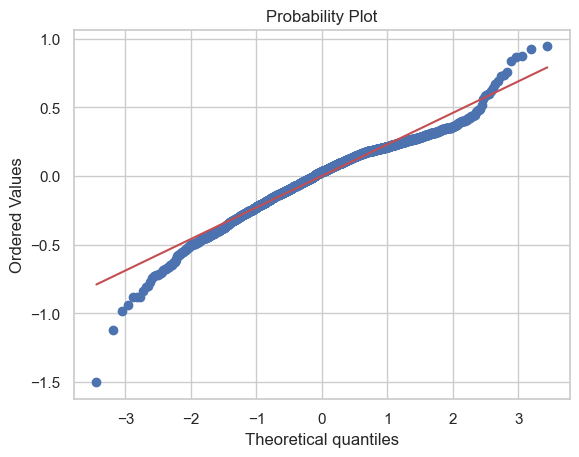

In [78]:
# QQ Plot
stats.probplot(df_prediction["Residuals (Original - Fitted)"], dist="norm", plot=pylab)
plt.show()

* Most of the points are lying on the straight line in QQ plot 

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Residuals are normally distributed.
* Alternate hypothesis - Residuals are not normally distributed.

In [79]:
w, p_value = stats.shapiro(df_prediction["Residuals (Original - Fitted)"]) 

print("=" * 120)
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
print("=" * 120)

As the p-value 3.394910742143917e-22 is less than the level of significance, we reject the null hypothesis.


**Based on Shapiro-Wilk test, Residuals are not normally distributed. However, as an approximation, we might be willing to accept this distribution as close to being normal as seen in histogram**

**TEST FOR HOMOSCEDASTICITY**

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [80]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_prediction["Residuals (Original - Fitted)"], X_train_6)

# Convert to dictionary for better readability
test_results = dict(zip(name, test))


# p-value
p_value = test_results['p-value']
# print(f"p-value: {test_results['p-value']:.5f}")
print("=" * 120)
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
print("=" * 120)

As the p-value 0.21790697635113523 is greater than the level of significance, we fail to reject the null hypothesis.


**Observation:** we get p-value > 0.05, we fail to reject the null hypothesis. this means the residuals are indeeed homoscedastic. 

**SUMMARY**

- **`TEST FOR NORMALITY`** assumption has `NOT` met. `P value is less than the 0.05`
  - **HOWEVER**
    - `HistPlot of Residual vs Fitted` is almost normal (slightly left skewed) and `QoQ` where most of the points are lying on the straight line
    - This behaviour is due to the fact the entire data set has lots of outliers and so we see the impact on the tails
- **`TEST FOR HOMOSCEDASTICITY`** assumption has met. 



**I AM TAKING RISK TO EVALUATE THE MODEL ON THE TEST SET AND SEE HOW THE MODEL IN BEHAVING**

**FIRST EVALUATION**
- TEST FOR NORMALITY `FAILED` ON P-VALUE BUT HISTOGRAM LOOK ALMOST NORMALLY DISTRIBUTED
- TEST FOR HOMOSCEDASTICITY `PASSES`

## Final Model

**`X_train_6`** --> is a training dataset so far <br>
**`olsresults_6`** --> is good predictive model yet so far based on the X_train_6 dataset.

- Print the `FINAL `predictive model

In [84]:
olsresults_6.params

const                   1.419142
screen_size             0.023702
main_camera_mp          0.020418
selfie_camera_mp        0.014154
ram                     0.020153
weight                  0.000855
normalized_new_price    0.417749
release_age            -0.022504
os_Others              -0.060244
4g_yes                  0.043701
dtype: float64

In [132]:
# The equation of linear regression
def print_model():
    Equation = "normalized_used_price ="
    print(Equation, end=" ")
    for i in range(len(X_train_6.columns)):
        if i == 0:
            print(olsresults_6.params[i], "+", end=" ")
        elif i != len(X_train_6.columns) - 1:
            print(
                olsresults_6.params[i],
                "* (",
                X_train_6.columns[i],
                ")",
                "+",
                end="  ",
            )
        else:
            print(olsresults_6.params[i], "* (", X_train_6.columns[i], ")")
print_model()

normalized_used_price = 1.4191417023517667 + 0.023702358181480213 * ( screen_size ) +  0.020417977197967827 * ( main_camera_mp ) +  0.014153752907190235 * ( selfie_camera_mp ) +  0.02015320405127489 * ( ram ) +  0.0008550219799948479 * ( weight ) +  0.4177488785311685 * ( normalized_new_price ) +  -0.02250404821045785 * ( release_age ) +  -0.06024403137415742 * ( os_Others ) +  0.043700514766463736 * ( 4g_yes )


**SYNHONIZDE TRAIN AND TEST DATA FORMAT**

In [95]:
X_train_6.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram',
       'weight', 'normalized_new_price', 'release_age', 'os_Others', '4g_yes'],
      dtype='object')

In [96]:
X_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'release_age', 'os_Others', 'os_Windows',
       'os_iOS', '4g_yes', '5g_yes'],
      dtype='object')

**DROP** following columns from x_test dataset
- `int_memory`  
- `battery` 
- `days_used`  
- `os_Windows`  
- `os_iOS`
- `5g_yes`

In [97]:
# drop columns from the test dataset that are not there in the training dataset
X_test_1 = X_test.drop(
    ["int_memory", "battery", "days_used", "os_Windows", "os_iOS", "5g_yes"], axis=1
)

**SANITY CHECK**

In [98]:
X_test_1.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram',
       'weight', 'normalized_new_price', 'release_age', 'os_Others', '4g_yes'],
      dtype='object')

In [99]:
X_train_6.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram',
       'weight', 'normalized_new_price', 'release_age', 'os_Others', '4g_yes'],
      dtype='object')

**MAKE PREDICTION ON TEST SET AND COMPARE WITH TRAINING SET**
 - RME


In [101]:
X_train_6.head()

const  screen_size  main_camera_mp  selfie_camera_mp  ram  weight  \
3026    1.0        10.29             8.0               0.3  4.0   120.0   
1525    1.0        15.34            13.0               5.0  4.0   225.0   
1128    1.0        12.70            13.0               5.0  4.0   162.0   
3003    1.0        12.83             8.0               5.0  4.0   160.0   
2907    1.0        12.88            13.0              16.0  4.0   160.0   

      normalized_new_price  release_age  os_Others  4g_yes  
3026              4.796204          7.0        0.0     0.0  
1525              5.434595          5.0        0.0     1.0  
1128              5.137914          6.0        0.0     0.0  
3003              5.189228          6.0        0.0     1.0  
2907              5.016220          4.0        0.0     1.0

In [100]:
X_test_1.head()

const  screen_size  main_camera_mp  selfie_camera_mp   ram  weight  \
866     1.0        15.24            8.00               2.0  4.00   206.0   
957     1.0        10.16            3.15               0.3  0.25   140.0   
280     1.0        15.39            8.00               8.0  2.00   185.0   
2150    1.0        12.83           13.00              16.0  4.00   148.0   
93      1.0        15.29           13.00               5.0  3.00   179.0   

      normalized_new_price  release_age  os_Others  4g_yes  
866               5.190788          7.0        0.0     0.0  
957               3.884652          8.0        0.0     0.0  
280               4.487287          1.0        0.0     1.0  
2150              5.639422          4.0        0.0     1.0  
93                5.300415          2.0        0.0     1.0

In [133]:
# # olsresults_6 is the model fitted on x_train_6 dataset 
# predict on X_test_1
print("PREDICTIVE MODEL")
print("=" * 120)
print_model()
print("=" * 120)

print("Metrics Comparision")
print("=" * 120)

olsmodel_train_perf = model_performance_regression(olsresults_6, X_train_6, y_train)
olsmodel_test_perf = model_performance_regression(olsresults_6, X_test_1, y_test)
print_table(olsmodel_train_perf, olsmodel_test_perf)

print("=" * 120)

PREDICTIVE MODEL
normalized_used_price = 1.4191417023517667 + 0.023702358181480213 * ( screen_size ) +  0.020417977197967827 * ( main_camera_mp ) +  0.014153752907190235 * ( selfie_camera_mp ) +  0.02015320405127489 * ( ram ) +  0.0008550219799948479 * ( weight ) +  0.4177488785311685 * ( normalized_new_price ) +  -0.02250404821045785 * ( release_age ) +  -0.06024403137415742 * ( os_Others ) +  0.043700514766463736 * ( 4g_yes )
Metrics Comparision
+----------------+-------------------+------------------+
|     Metric     | Train Performance | Test Performance |
+----------------+-------------------+------------------+
|      RMSE      |       0.233       |      0.237       |
|      MAE       |       0.183       |      0.182       |
|   R-squared    |       0.841       |      0.844       |
| Adj. R-squared |        0.84       |      0.843       |
|      MAPE      |       4.395       |      4.445       |
+----------------+-------------------+------------------+


## Insights

**Model Overview**

The linear regression model provided shows how various features (such as screen_size, ram, release_age, etc.) influence the predicted price of a used phone/tablet. The model's equation indicates that features like screen size, camera megapixels, RAM, and the release age have a significant influence on the price.

- The RMSE and MAE values are very close between the training and testing datasets, indicating that the model generalizes well to unseen data. 
- The R-squared value (0.841 for training, 0.844 for testing) indicates that around 84% of the variance in the `price` is explained by the model, which is quite good.
- The adjusted R-squared is similar, showing that the model does not suffer from overfitting. It remains consistent across training and test datasets.
- Positive coefficients indicate features that increase the price of the device (e.g., screen size, main camera megapixels, RAM, 4G support).
- Negative coefficients suggest features that decrease the price (e.g., release_age, operating system type)
- normalized_new_price has the highest coefficients, that means its significant factor in determining its used price. 
- The release_age feature has a negative coefficient indicate older the device, the lower its resale value, which make sense

 ## Recommendations

- Screen Size and Camera Megapixels (both main and selfie) are significant contributors to the price. Emphasize these features on pricing strategy to target consumers who prioritize these aspects when buying used devices.
- RAM also significantly influences the price, consider the device's RAM capacity when pricing refurbished devices.
- The model shows that older devices tend to be cheaper. If a device is few years old, the price should reflect that depreciation.
- Devices with 4G support have a positive coefficient, ReCell could highlight this feature when pricing and selling refurbished devices.

**The performance metrics (RMSE, MAE, R-squared) are similar between the training and test data, indicating that the model generalizes well. This means that ReCell can rely on the model for pricing devices in real-world scenarios, knowing it is stable and not overfitting.**

___